# Introduction
Tabular Playground Series - Aug 2021
The original dataset deals with calculating the loss associated with a loan defaults. Although the features are anonymized, they have properties relating to real-world features.

In [50]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [52]:
train  = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Tabular Playground Series/Aug 2021/train.csv')

In [4]:
train.head()

id        f0   f1        f2        f3          f4        f5        f6  \
0   0 -0.002350   59  0.766739 -1.350460     42.2727  16.68570   30.3599   
1   1  0.784462  145 -0.463845 -0.530421  27324.9000   3.47545  160.4980   
2   2  0.317816   19 -0.432571 -0.382644   1383.2600  19.71290   31.1026   
3   3  0.210753   17 -0.616454  0.946362   -119.2530   4.08235  185.2570   
4   4  0.439671   20  0.968126 -0.092546     74.3020  12.30650   72.1860   

         f7         f8  ...        f91        f92      f93       f94  \
0  1.267300   0.392007  ...  -42.43990  26.854000  1.45751  0.696161   
1  0.828007   3.735860  ... -184.13200   7.901370  1.70644 -0.494699   
2 -0.515354  34.430800  ...    7.43721  37.218100  3.25339  0.337934   
3  1.383310 -47.521400  ...    9.66778   0.626942  1.49425  0.517513   
4 -0.233964  24.399100  ...  290.65700  15.604300  1.73557 -0.476668   

         f95       f96       f97      f98       f99  loss  
0   0.941764  1.828470  0.924090  2.29658  10.48980    15  
1  -2.058300  0.819184  0.439152  2.36470   1.14383     3  
2   0.615037  2.216760  0.745268  1.69679  12.30550     6  
3 -10.222100  2.627310  0.617270  1.45645  10.02880     2  
4   1.390190  2.195740  0.826987  1.78485   7.07197     1  

[5 rows x 102 columns]

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Columns: 102 entries, id to loss
dtypes: float64(95), int64(7)
memory usage: 194.5 MB


In [6]:
missing_record = round(train.isnull().sum()/len(train.index),2)*100

In [7]:
missing_record.to_csv('missing.csv')

In [8]:
#No missing data

In [53]:
test  = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Tabular Playground Series/Aug 2021/test.csv')

In [10]:
test.head()

id        f0   f1        f2        f3          f4        f5         f6  \
0  250000  0.812665   15 -1.239120 -0.893251    295.5770  15.87120   23.04360   
1  250001  0.190344  131 -0.501361  0.801921     64.8866   3.09703  344.80500   
2  250002  0.919671   19 -0.057382  0.901419  11961.2000  16.39650  273.24000   
3  250003  0.860985   19 -0.549509  0.471799   7501.6000   2.80698   71.08170   
4  250004  0.313229   89  0.588509  0.167705   2931.2600   4.34986    1.57187   

         f7         f8  ...       f90        f91       f92      f93       f94  \
0  0.942256  29.898000  ...  0.446389   -422.332  -1.44630  1.69075  1.059300   
1  0.807194  38.421900  ...  0.377179  10352.200  21.06270  1.84351  0.251895   
2 -0.003300  37.940000  ...  0.990140   3224.020  -2.25287  1.55100 -0.559157   
3  0.792136   0.395235  ...  1.396880   9689.760  14.77150  1.41390  0.329272   
4  1.118300   7.754630  ...  0.862502   2693.350  44.18050  1.58020 -0.191021   

         f95      f96       f97       f98       f99  
0  -3.010570  1.94664  0.529470  1.386950   8.78767  
1   4.440570  1.90309  0.248534  0.863881  11.79390  
2  17.838600  1.83385  0.931796  2.336870   9.05400  
3   0.802437  2.23251  0.893348  1.359470   4.84833  
4  26.253000  2.68238  0.361923  1.532800   3.70660  

[5 rows x 101 columns]

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Columns: 101 entries, id to f99
dtypes: float64(95), int64(6)
memory usage: 115.6 MB


In [12]:
train.describe()

id             f0             f1             f2  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean   124999.500000       0.511213      51.378476       0.107155   
std     72168.927986       0.307884      42.396636       1.322200   
min         0.000000      -0.069273     -17.000000      -7.895580   
25%     62499.750000       0.251287      18.000000      -0.611172   
50%    124999.500000       0.514962      41.000000       0.253815   
75%    187499.250000       0.777322      75.000000       0.759249   
max    249999.000000       1.072070     273.000000       9.768590   

                  f3             f4             f5             f6  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean        0.050010    3595.133426       8.205953     164.508753   
std         0.792368    6072.401061       5.475723     183.335563   
min        -1.475560   -7589.280000      -3.291050     -40.967200   
25%        -0.719418     163.864750       4.110127      27.894900   
50%         0.004099     943.000500       7.472445      91.005250   
75%         0.765456    4115.355000      11.030950     240.843750   
max         1.680190   37847.500000      35.078000     947.143000   

                  f7             f8  ...            f91            f92  \
count  250000.000000  250000.000000  ...  250000.000000  250000.000000   
mean        0.375533      16.669745  ...    4856.812768      22.579100   
std         0.813597      99.758709  ...    8501.609009      14.849390   
min        -4.143080    -502.813000  ...  -12695.700000      -4.059170   
25%        -0.026245     -17.392025  ...      73.203100      11.525450   
50%         0.619862       8.714945  ...    1060.025000      19.993200   
75%         0.933855      55.407625  ...    5572.982500      32.271625   
max         4.010380     465.956000  ...   54334.600000      79.912400   

                 f93            f94            f95            f96  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean        2.030554       0.079692       1.555097       2.417556   
std         0.900211       0.587780       9.253785       0.892563   
min         0.057800      -1.998800     -24.686300      -1.131980   
25%         1.471650      -0.408975      -4.004925       1.906718   
50%         1.660830       0.215710       0.759942       2.340430   
75%         2.320085       0.503134       6.202503       2.910020   
max         5.403020       1.944190      42.890400       5.576040   

                 f97            f98            f99           loss  
count  250000.000000  250000.000000  250000.000000  250000.000000  
mean        0.537484       1.576900       8.048805       6.813920  
std         0.226589       0.646306       5.647368       7.940179  
min         0.005249      -0.646967      -0.842397       0.000000  
25%         0.359646       1.215810       3.732800       1.000000  
50%         0.531348       1.451285       7.182205       4.000000  
75%         0.709807       1.901632      10.998550      10.000000  
max         1.105400       4.492620      34.019200      42.000000  

[8 rows x 102 columns]

Lets check now skewness in the data

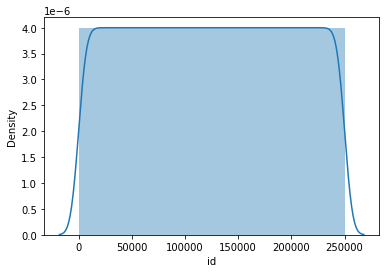

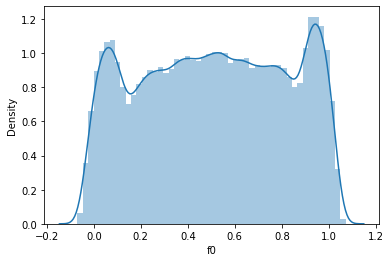

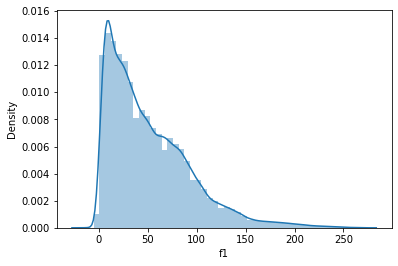

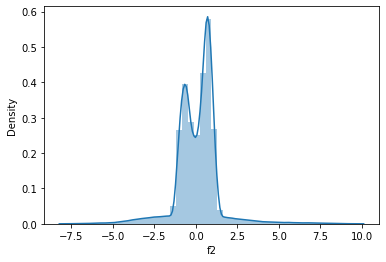

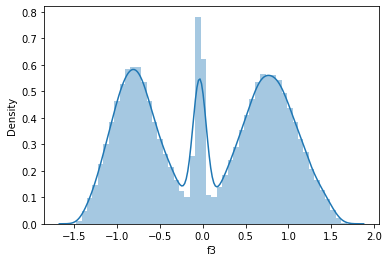

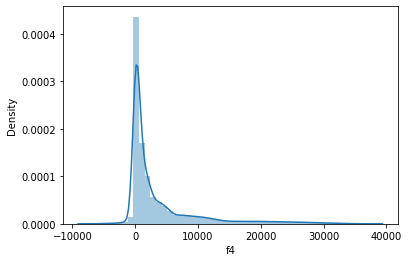

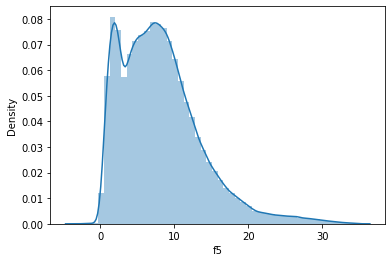

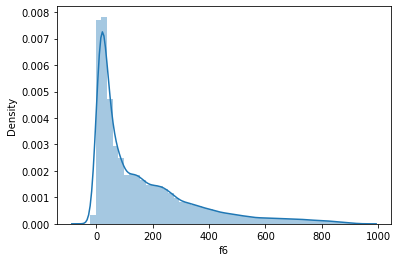

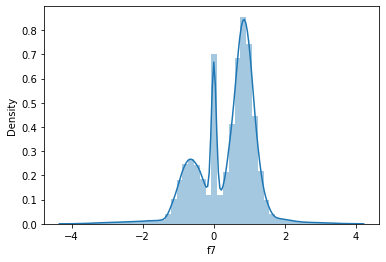

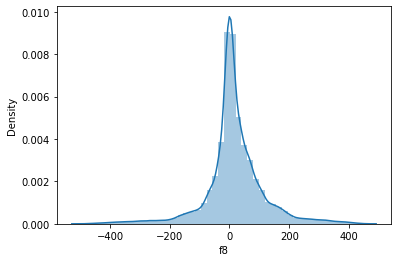

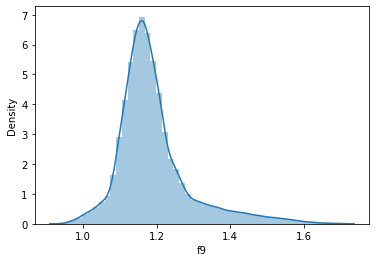

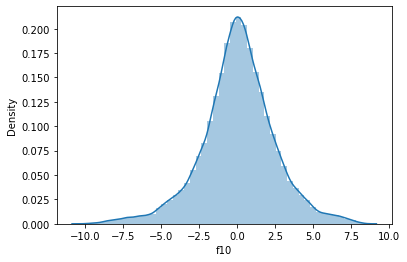

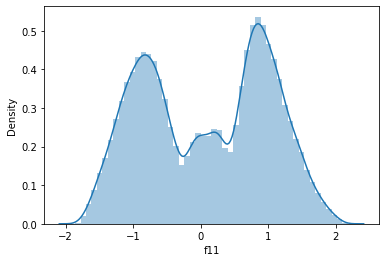

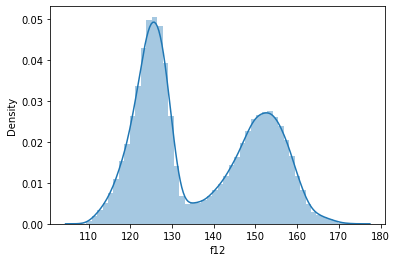

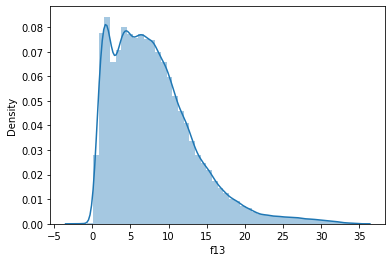

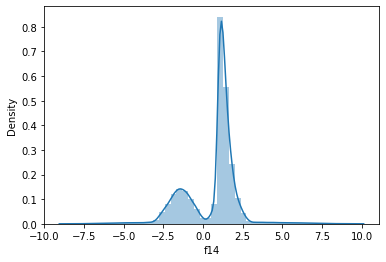

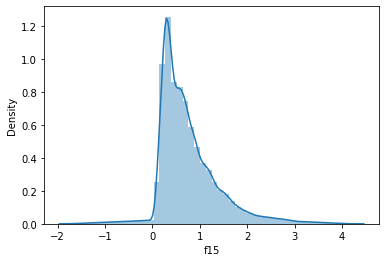

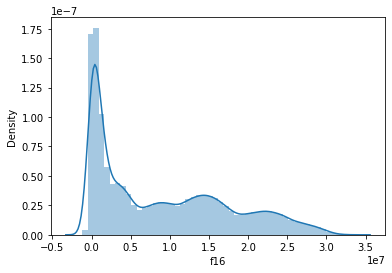

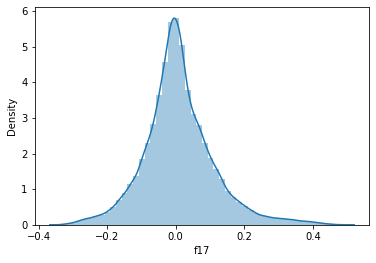

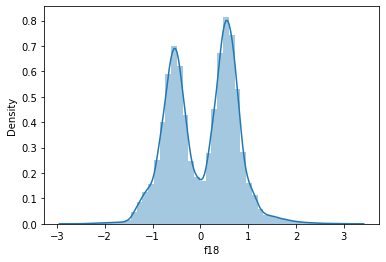

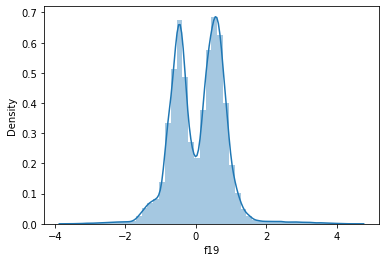

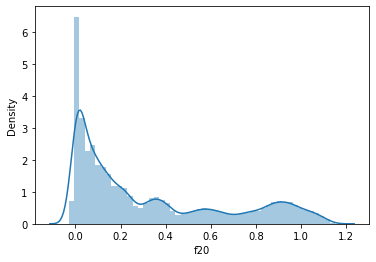

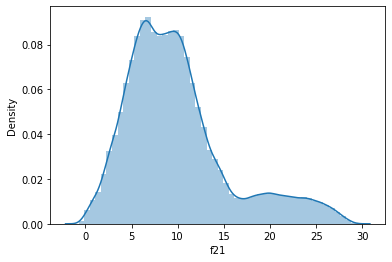

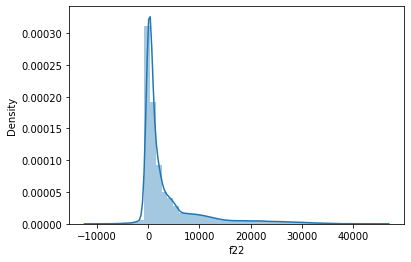

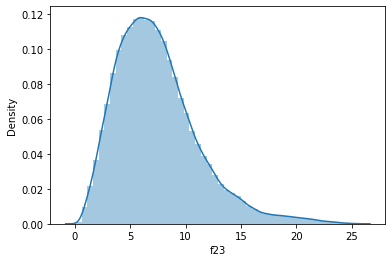

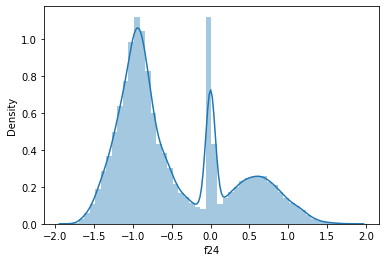

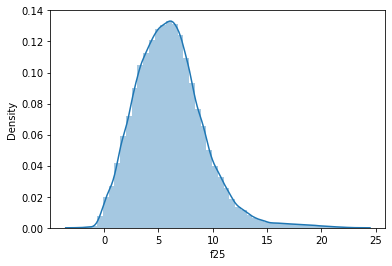

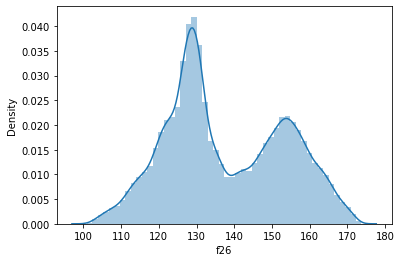

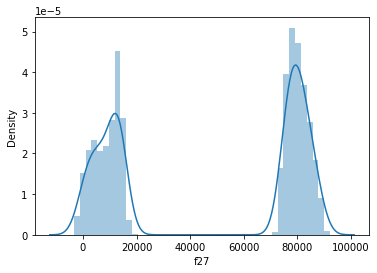

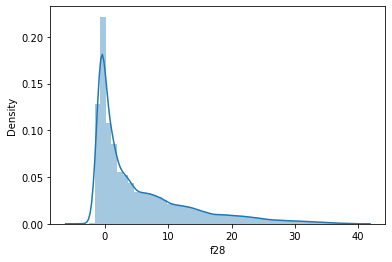

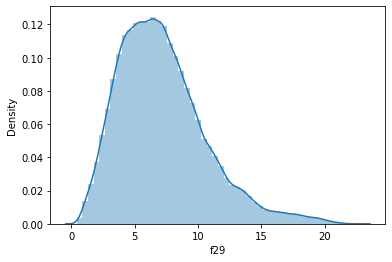

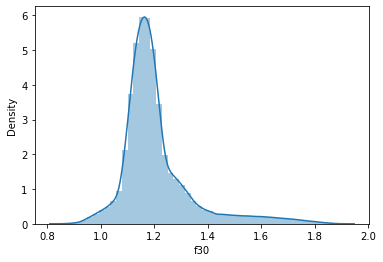

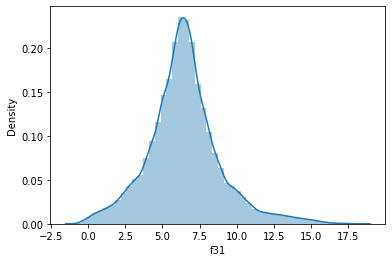

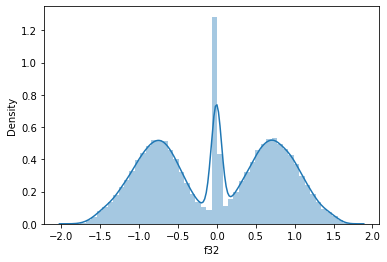

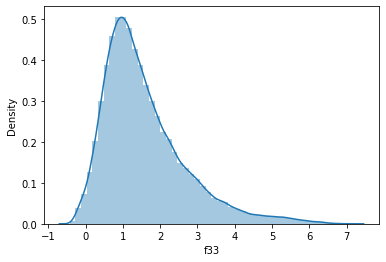

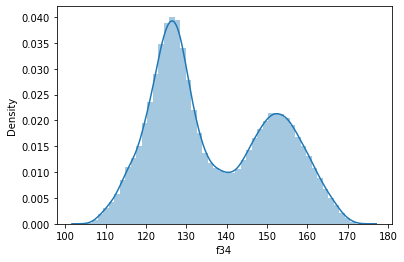

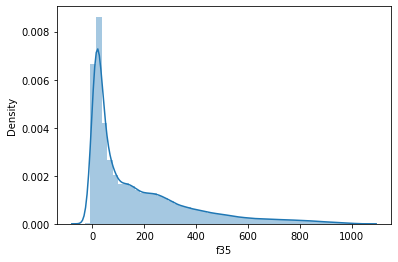

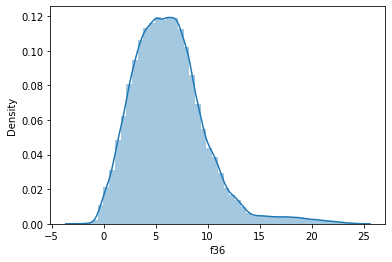

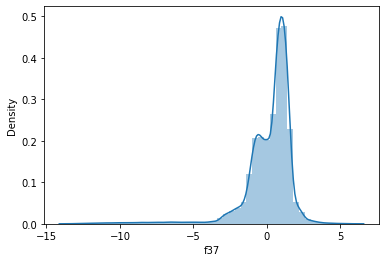

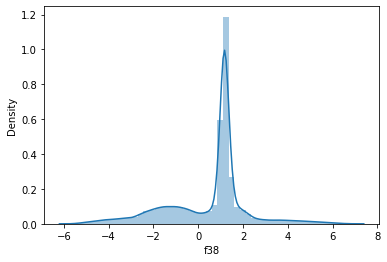

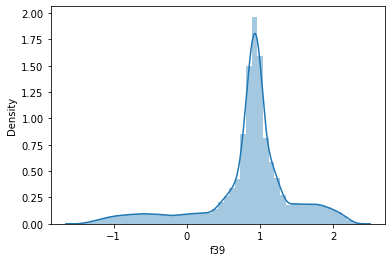

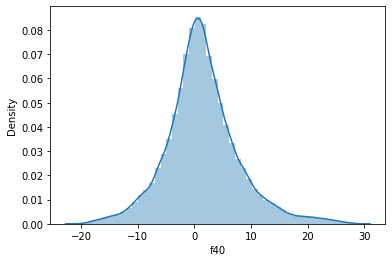

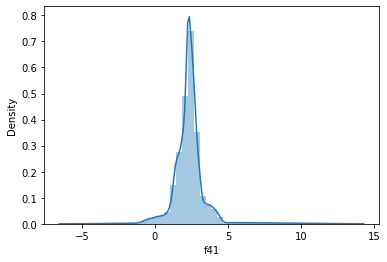

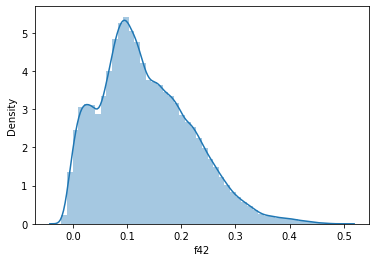

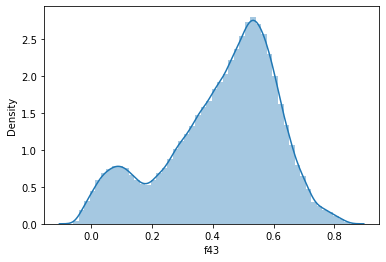

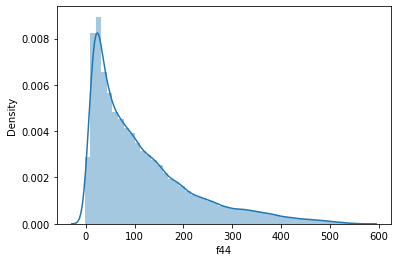

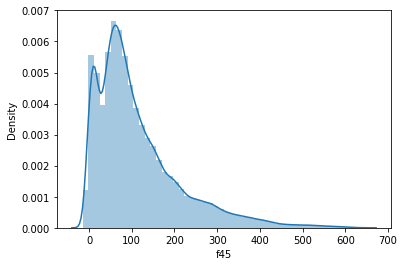

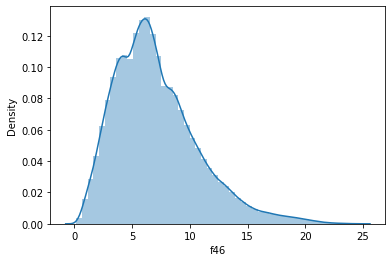

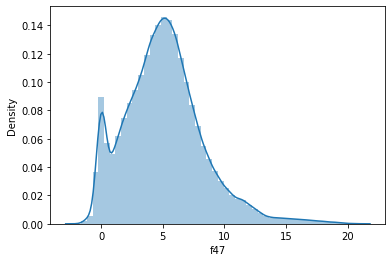

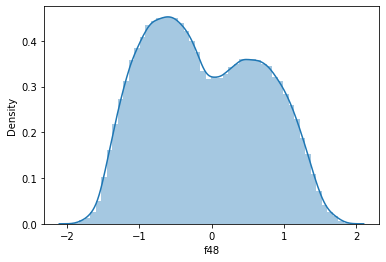

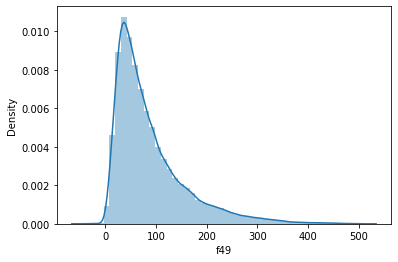

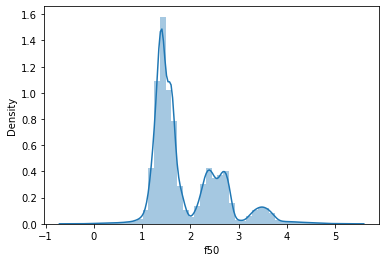

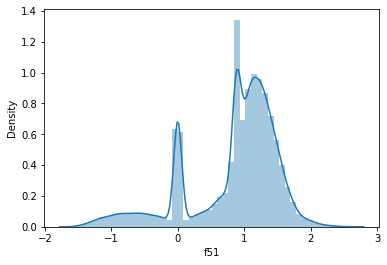

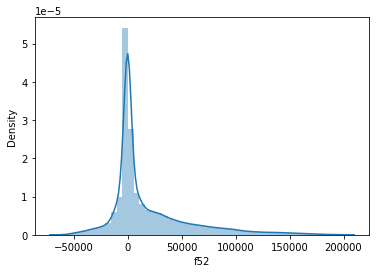

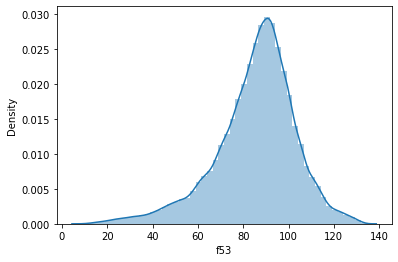

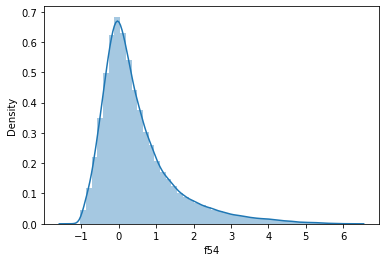

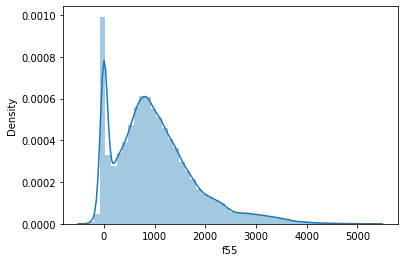

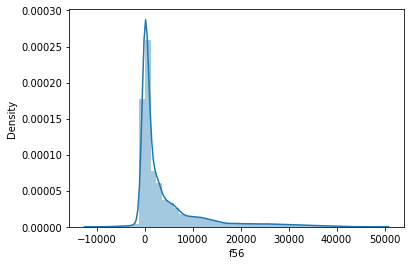

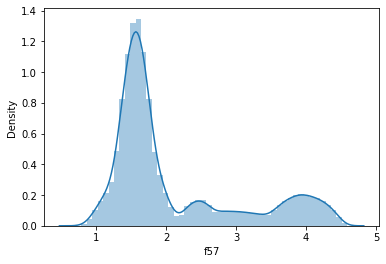

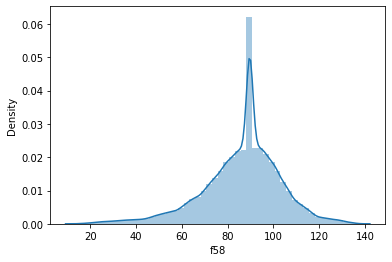

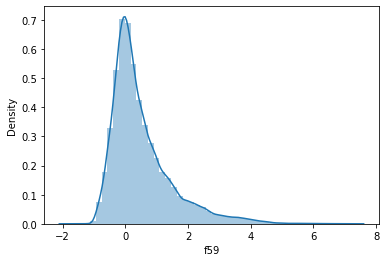

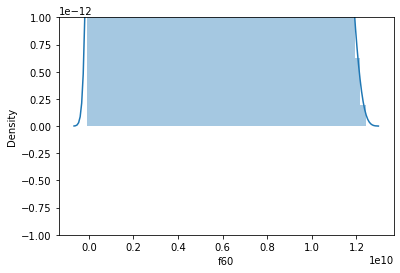

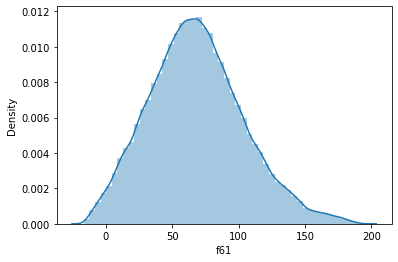

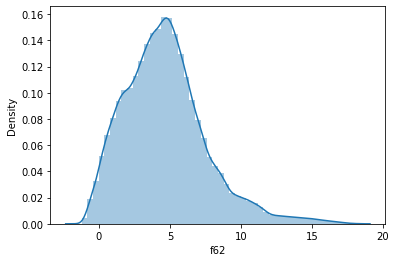

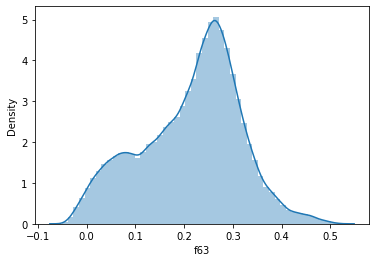

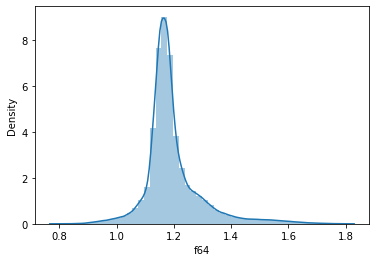

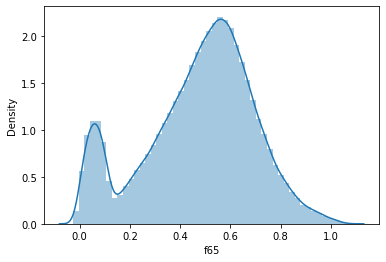

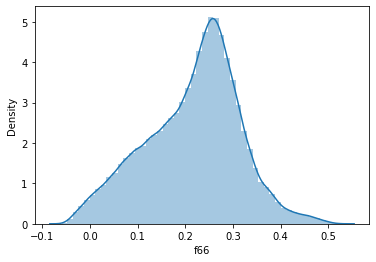

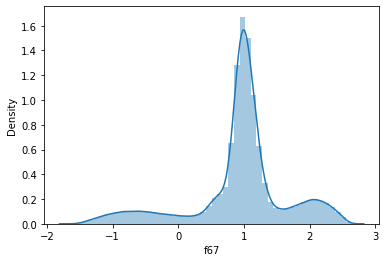

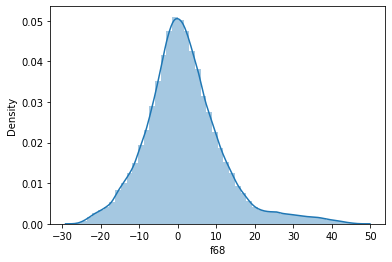

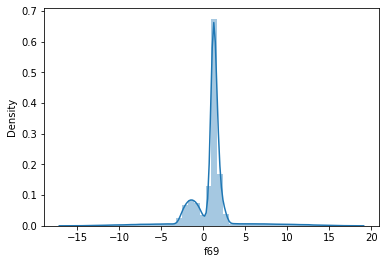

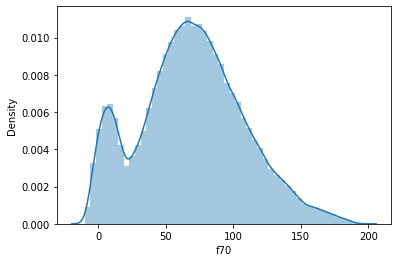

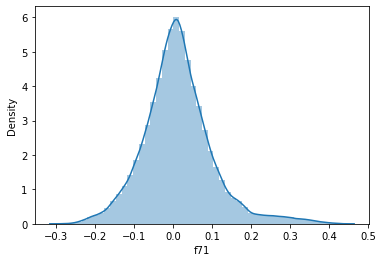

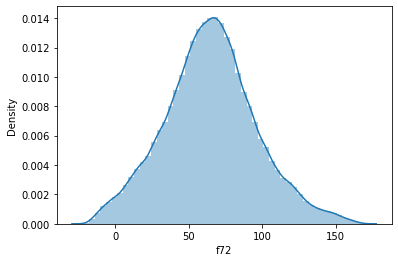

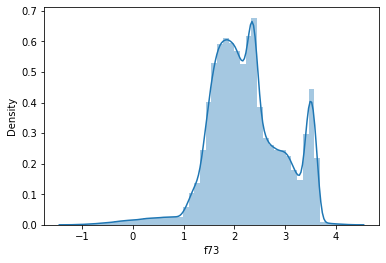

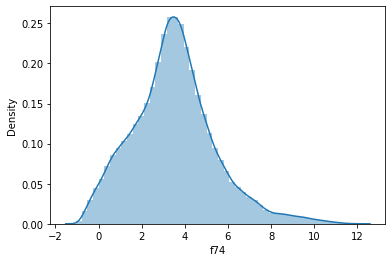

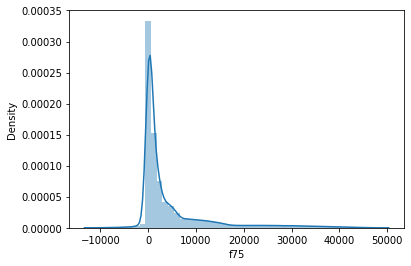

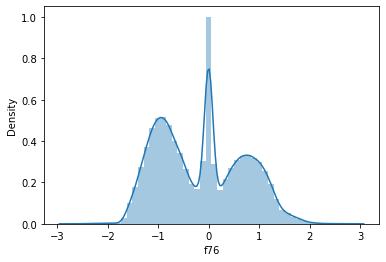

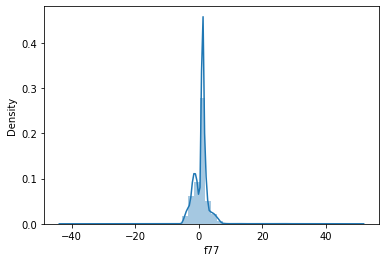

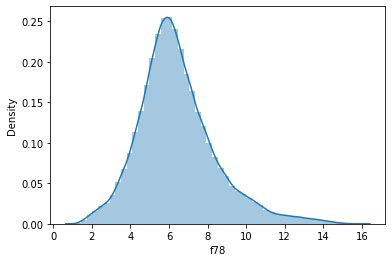

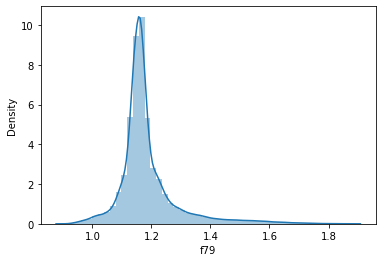

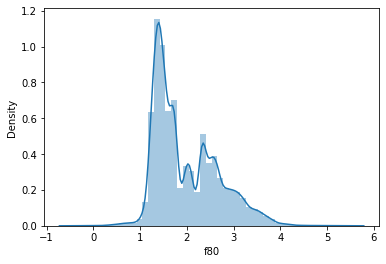

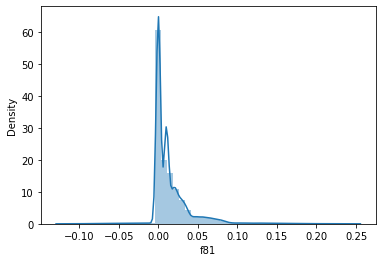

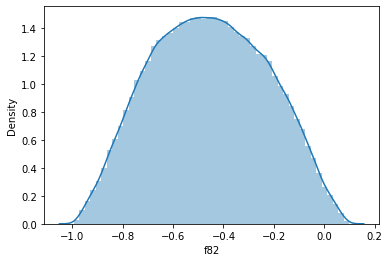

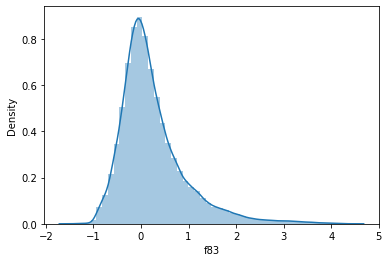

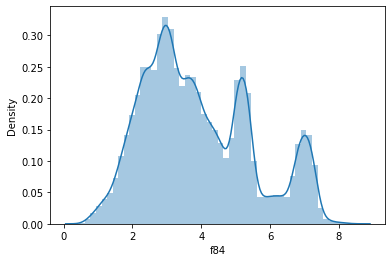

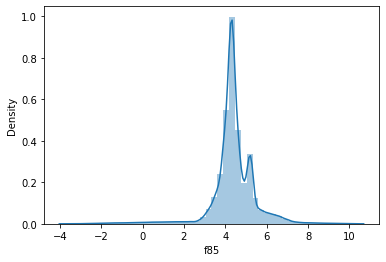

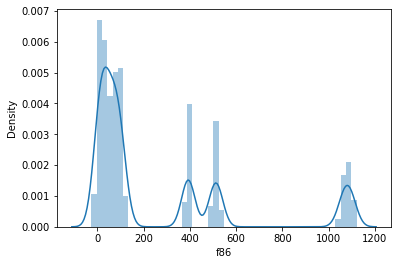

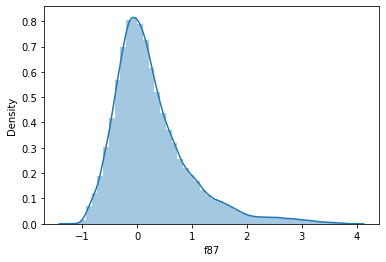

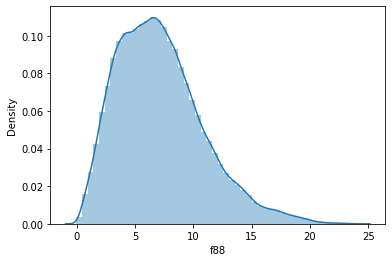

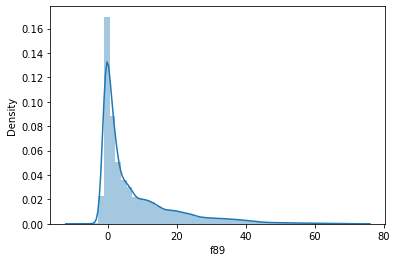

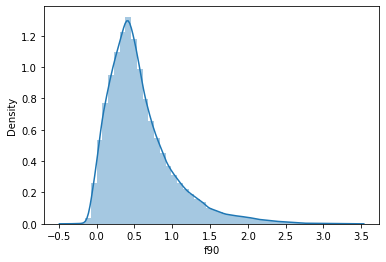

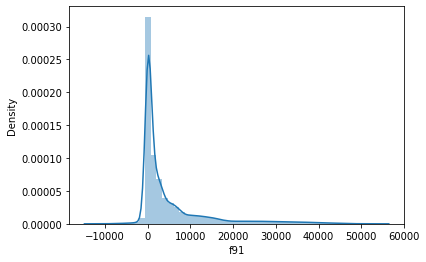

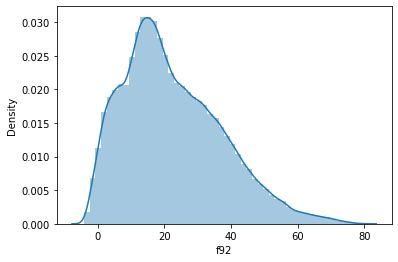

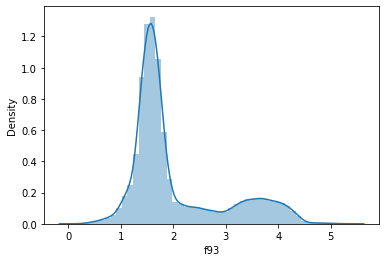

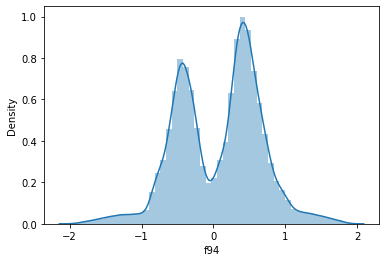

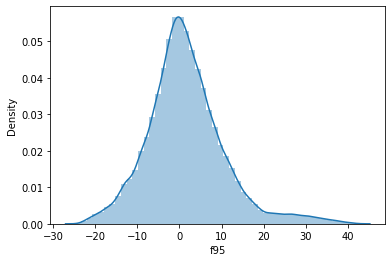

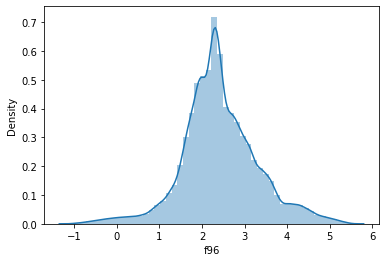

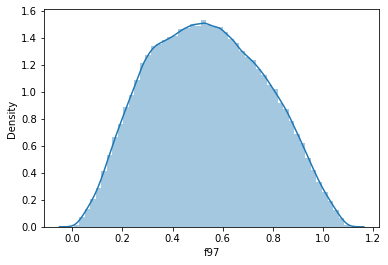

In [13]:
for i in range(0,99):
  sns.distplot(train.iloc[:,i])
  plt.show();

In [14]:
# We observe that few predictors are skewed wither left or right skewed.We will remove these skeness to make it more Gaussian.

In [15]:
X_skewed = train.skew(axis = 0,skipna=True)
X_skewed_df = pd.DataFrame(X_skewed)
X_skewed_df = X_skewed_df.reset_index()
X_skewed_df.columns = ['Feature','Skew']
X_skewed_df

Feature      Skew
0        id  0.000000
1        f0 -0.041749
2        f1  1.278527
3        f2  0.484599
4        f3 -0.020065
..      ...       ...
97      f96  0.103864
98      f97  0.093511
99      f98  0.760292
100     f99  1.106963
101    loss  1.465319

[102 rows x 2 columns]

In [16]:
#Filterering acceptable skewness
X_skewed_df_not_acceptable = X_skewed_df[(X_skewed_df['Skew'] > 2) | (X_skewed_df['Skew'] < -2)]


In [17]:
X_skewed_df_not_acceptable

Feature      Skew
5       f4  2.452174
23     f22  2.555241
38     f37 -3.090560
57     f56  2.473458
76     f75  2.583632
78     f77  2.991062
80     f79  2.149808
82     f81  2.637763
92     f91  2.468963

In [18]:
# Since we have both positive (right skewd and negative(left skewd values), we will use 'yeo-johnson' method of power transformation to make the data more Gaussian)

In [19]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = 'yeo-johnson',standardize=True)
train_new_pt = pt.fit_transform(train)

In [20]:
train_new_pt = pd.DataFrame(train_new_pt,columns = train.columns)
train_new_pt.head()

id        f0        f1        f2        f3        f4        f5  \
0 -2.196755 -1.691512  0.426243  0.509055 -1.758372 -0.540284  1.411277   
1 -2.196394  0.888882  1.767768 -0.421396 -0.734680  3.294103 -0.870842   
2 -2.196084 -0.619101 -0.713838 -0.397284 -0.549381 -0.254638  1.740840   
3 -2.195803 -0.973712 -0.800257 -0.539350  1.132801 -0.667368 -0.697720   
4 -2.195543 -0.219771 -0.672636  0.658249 -0.184668 -0.530839  0.856699   

         f6        f7        f8  ...       f91       f92       f93       f94  \
0 -0.768996  1.190411 -0.183546  ... -0.535220  0.403961 -0.605954  1.058579   
1  0.343244  0.513712 -0.149904  ... -0.635756 -0.980948 -0.148582 -0.980679   
2 -0.757145 -1.120369  0.163781  ... -0.509441  0.990457  1.381069  0.413577   
3  0.473253  1.378750 -0.649261  ... -0.508839 -1.874235 -0.531890  0.734013   
4 -0.272371 -0.836217  0.060793  ... -0.455373 -0.342871 -0.101221 -0.951981   

        f95       f96       f97       f98       f99      loss  
0  0.037208 -0.661935  1.650888  1.112626  0.620347  1.146444  
1 -0.312774 -1.785286 -0.406987  1.206119 -1.661599 -0.112805  
2  0.002025 -0.227575  0.921498  0.245084  0.871210  0.394287  
3 -1.402685  0.232754  0.379371 -0.128625  0.552022 -0.372835  
4  0.084682 -0.251115  1.258643  0.377936  0.054486 -0.738578  

[5 rows x 102 columns]

In [21]:
#lets check the skeness again after power transformation
X_skewed = train_new_pt.skew(axis = 0,skipna=True)
X_skewed_df = pd.DataFrame(X_skewed)
X_skewed_df = X_skewed_df.reset_index()
X_skewed_df.columns = ['Feature','Skew']
X_skewed_df

Feature      Skew
0        id -0.291570
1        f0 -0.073260
2        f1 -0.136832
3        f2  0.155344
4        f3 -0.011421
..      ...       ...
97      f96  0.130105
98      f97 -0.022396
99      f98  0.089727
100     f99 -0.036814
101    loss -0.002666

[102 rows x 2 columns]

In [22]:
#Filterering acceptable skewness
X_skewed_df_not_acceptable = X_skewed_df[(X_skewed_df['Skew'] > 2) | (X_skewed_df['Skew'] < -2)]
X_skewed_df_not_acceptable

Empty DataFrame
Columns: [Feature, Skew]
Index: []

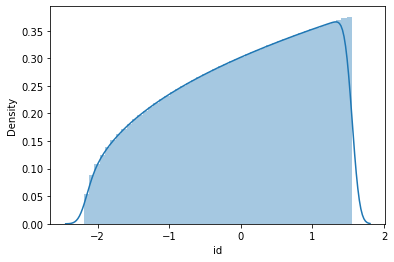

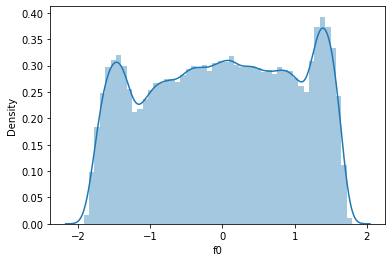

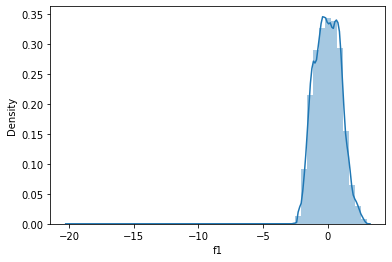

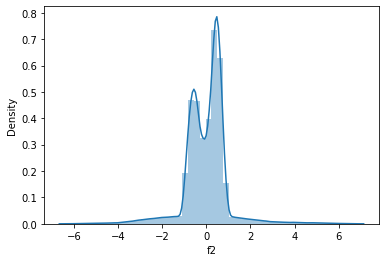

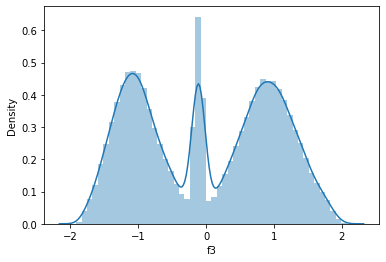

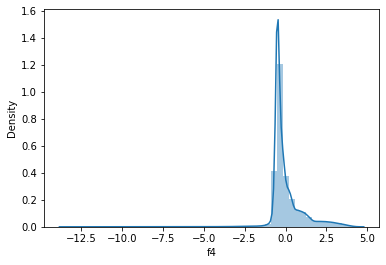

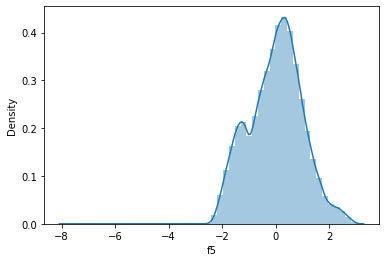

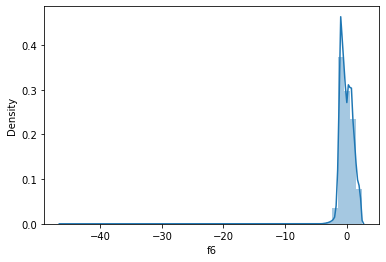

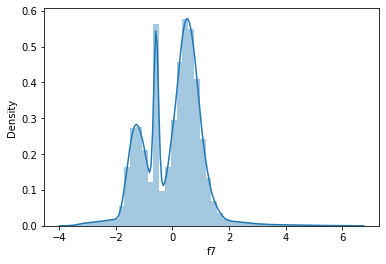

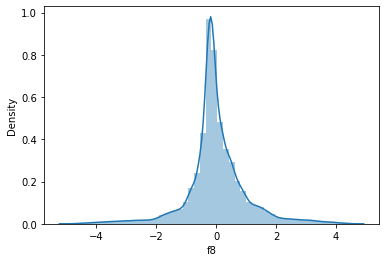

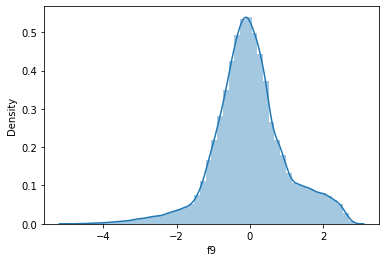

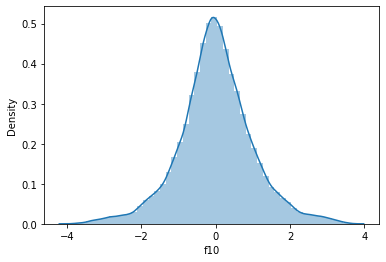

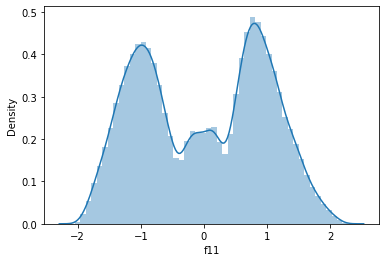

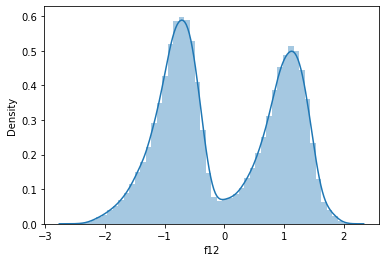

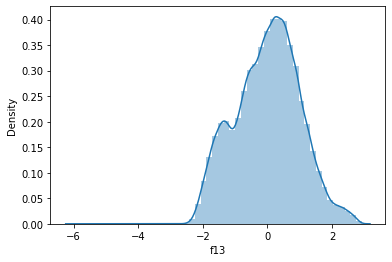

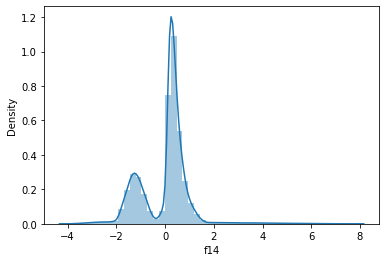

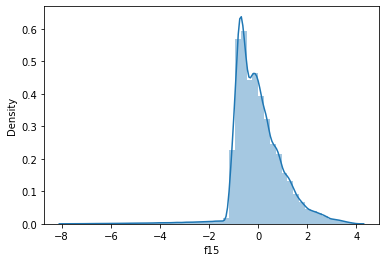

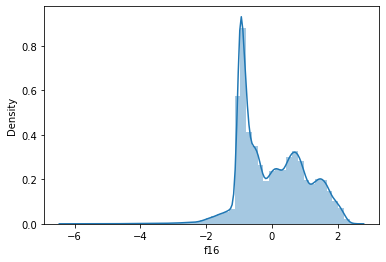

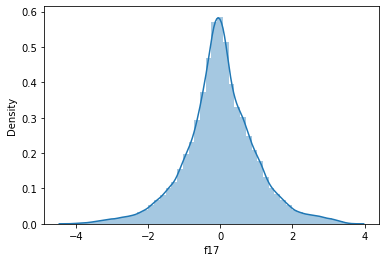

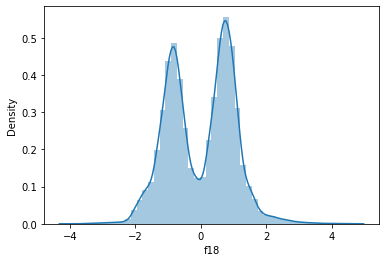

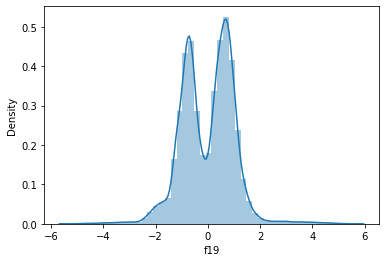

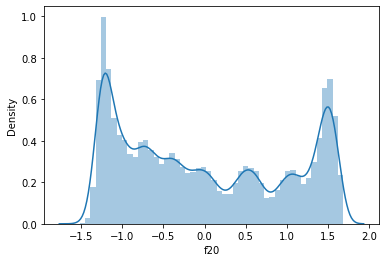

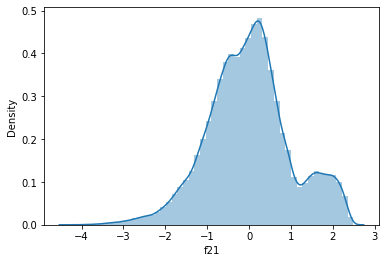

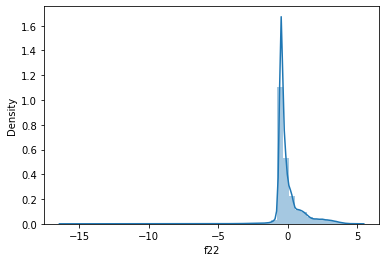

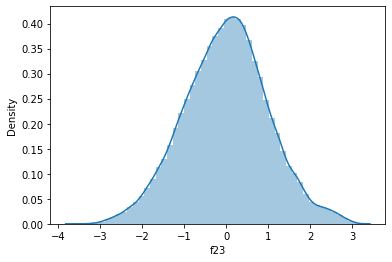

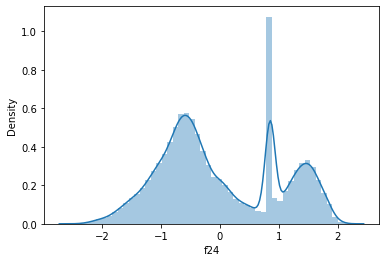

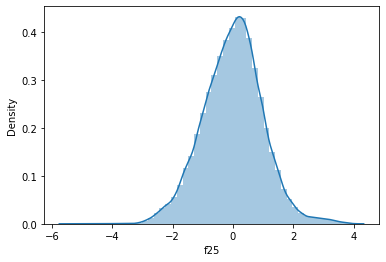

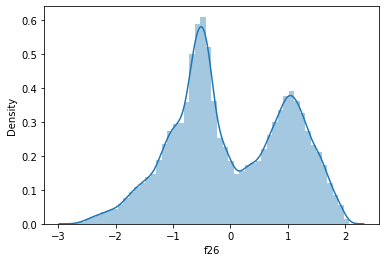

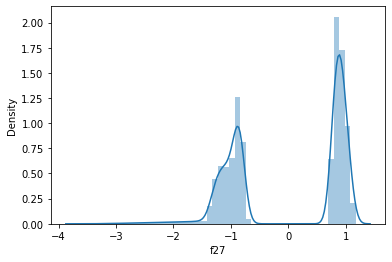

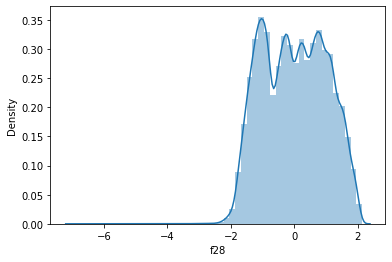

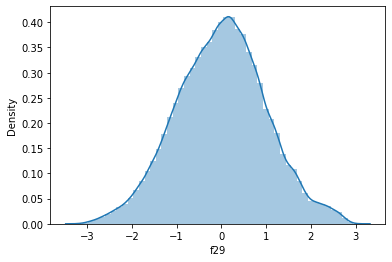

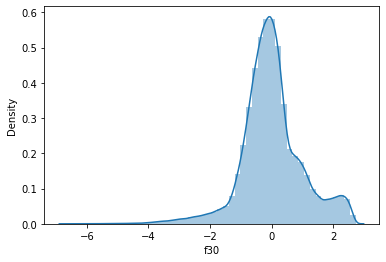

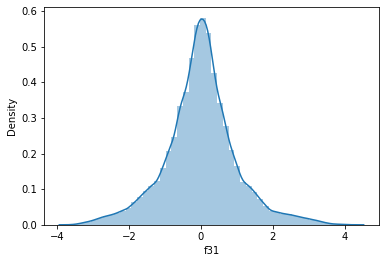

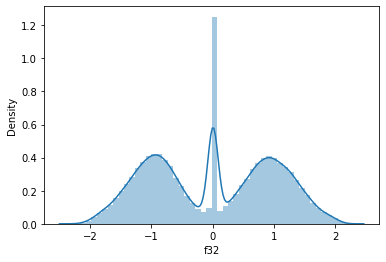

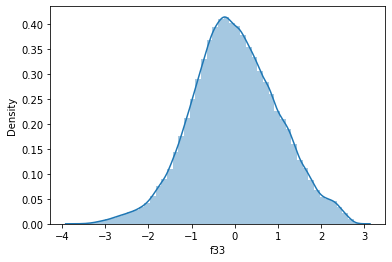

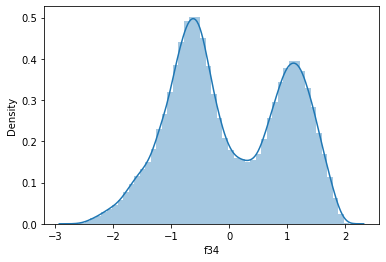

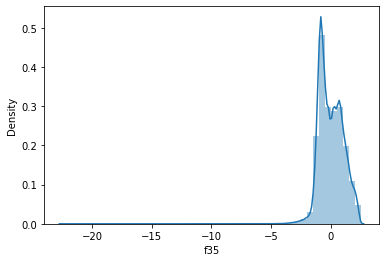

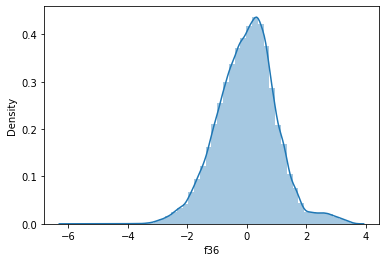

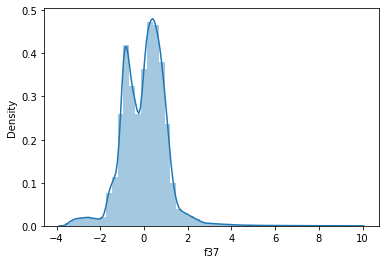

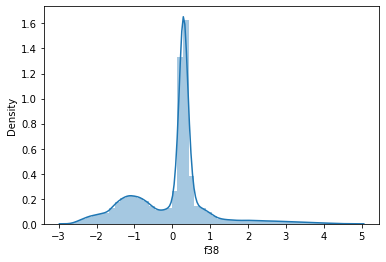

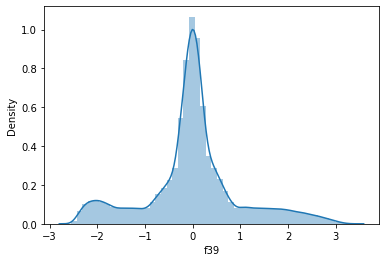

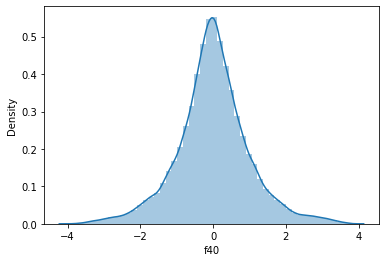

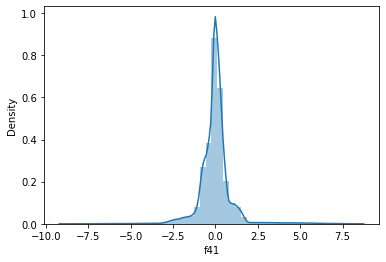

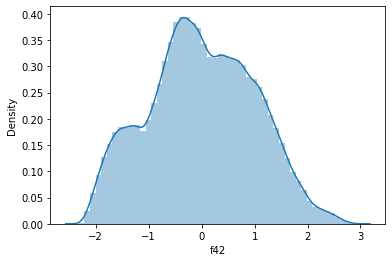

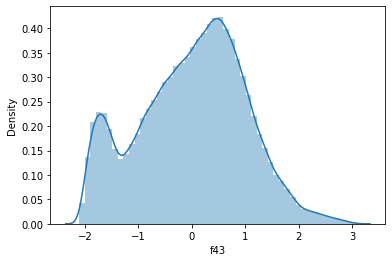

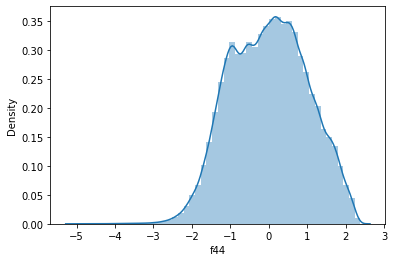

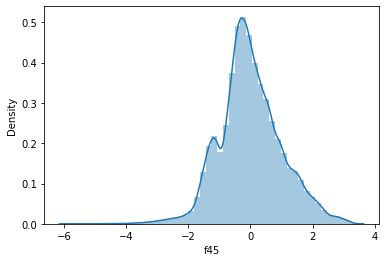

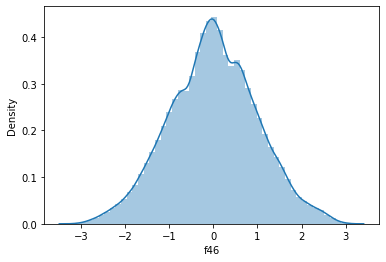

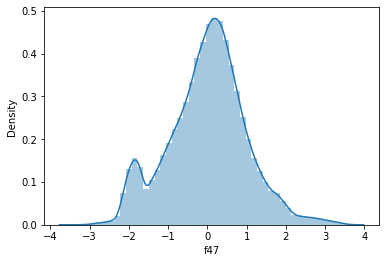

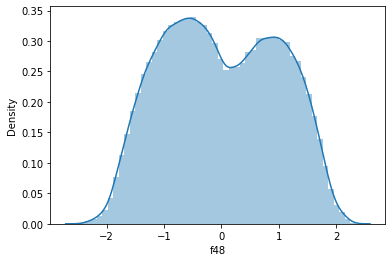

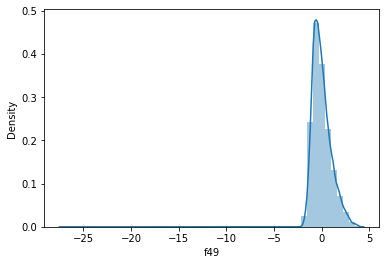

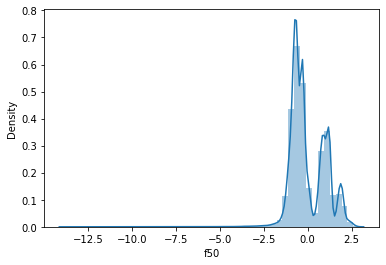

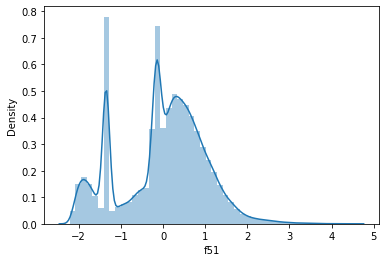

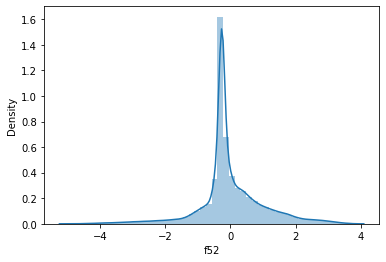

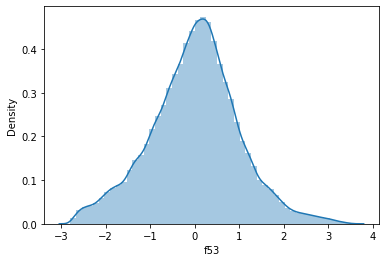

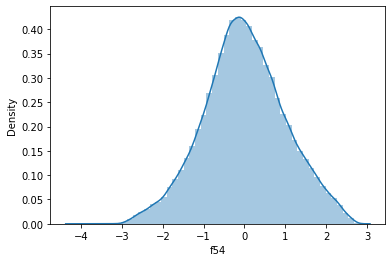

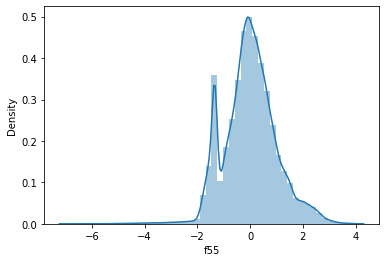

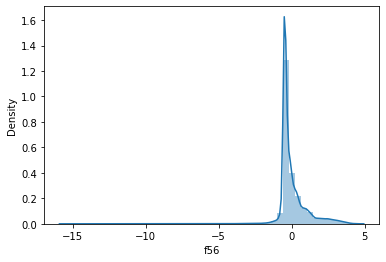

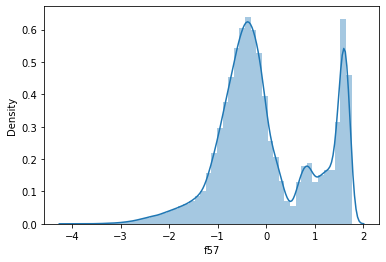

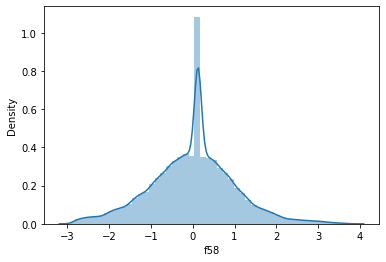

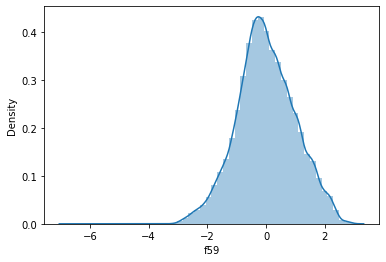

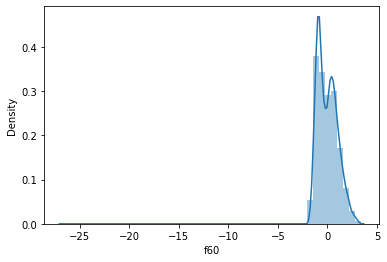

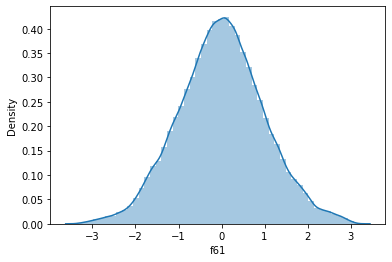

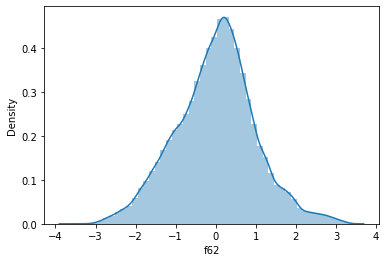

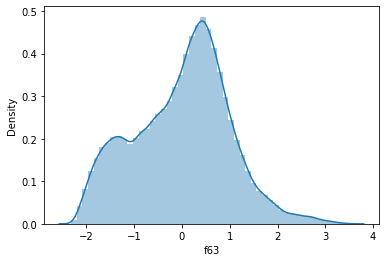

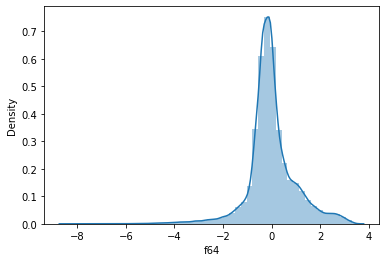

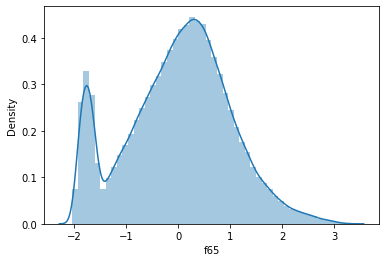

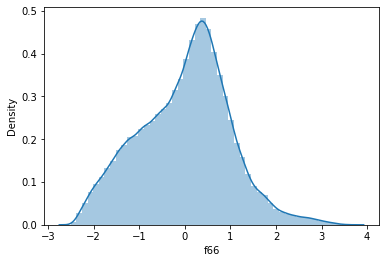

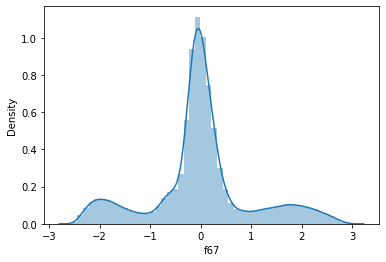

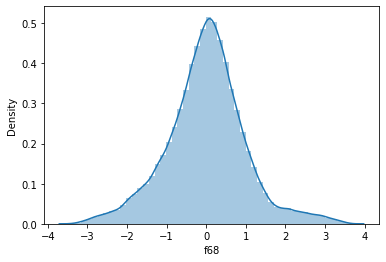

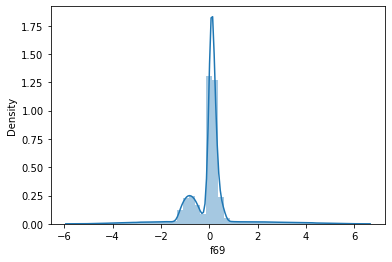

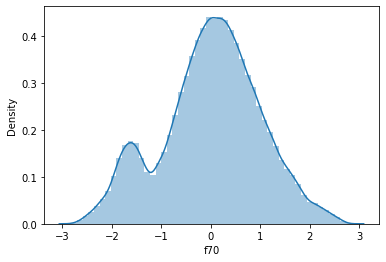

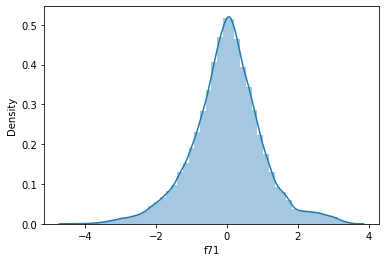

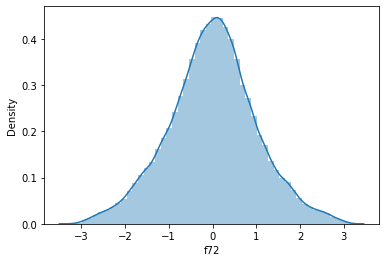

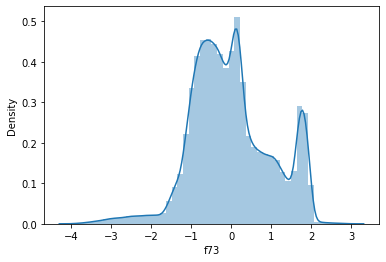

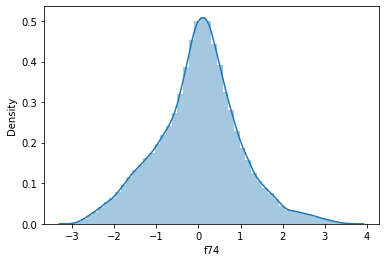

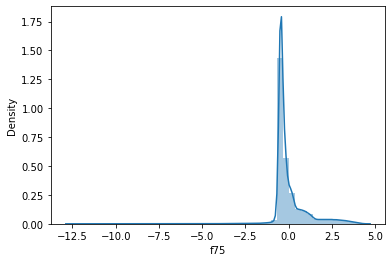

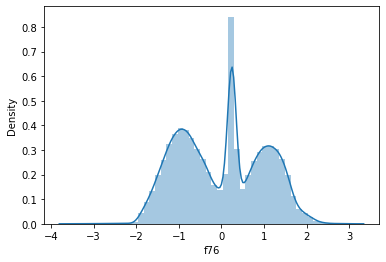

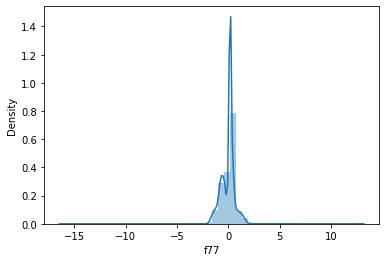

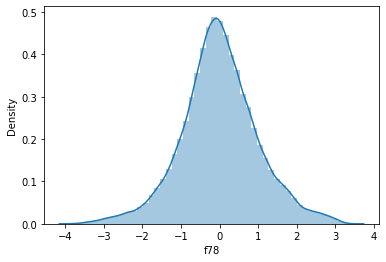

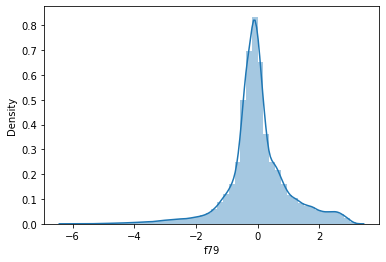

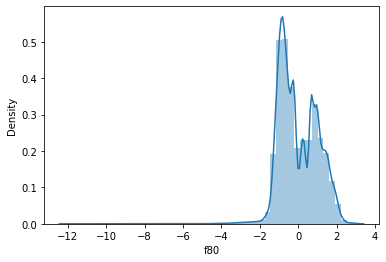

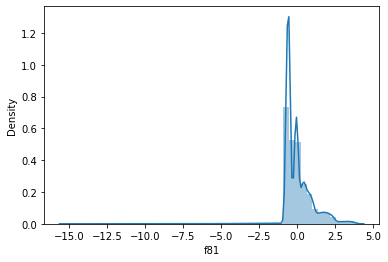

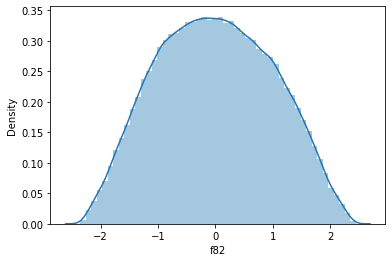

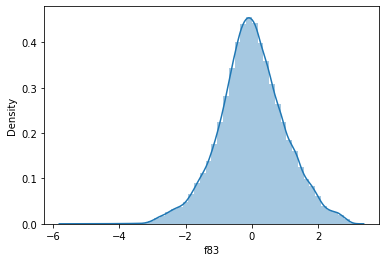

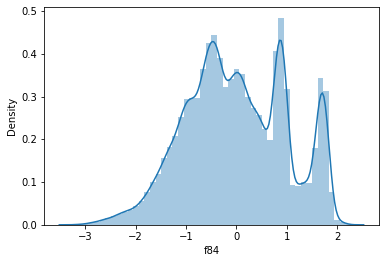

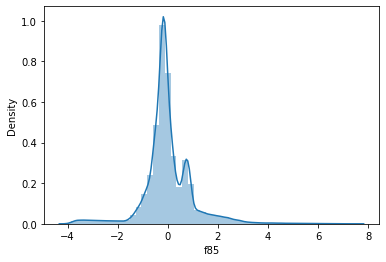

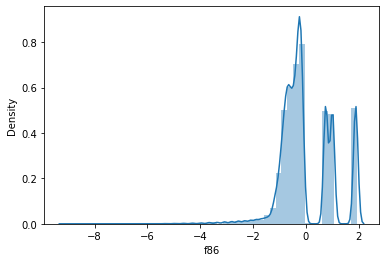

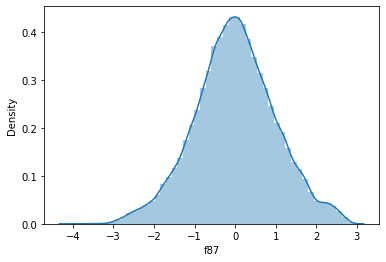

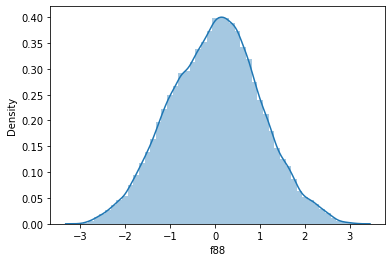

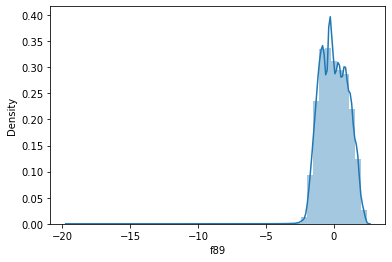

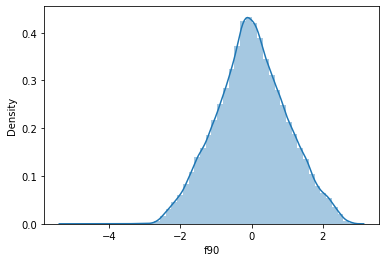

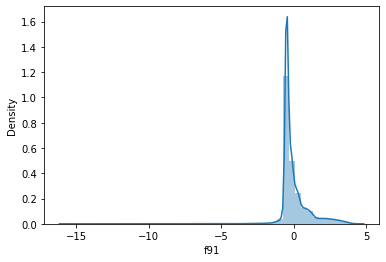

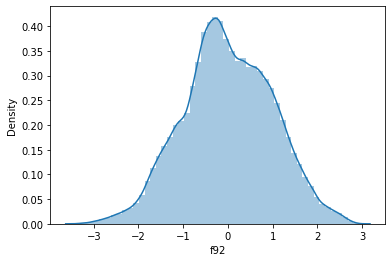

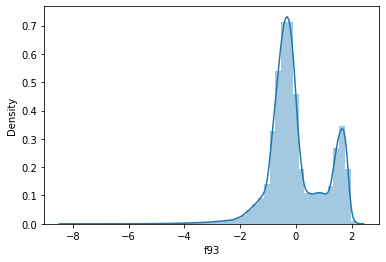

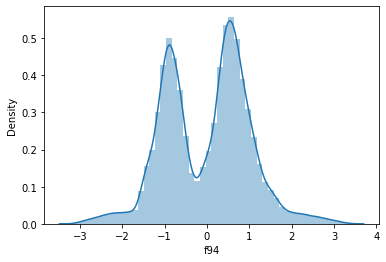

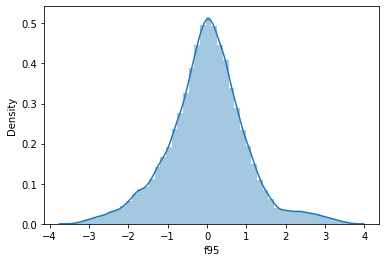

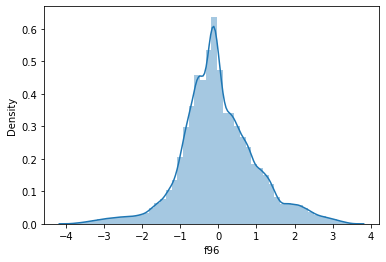

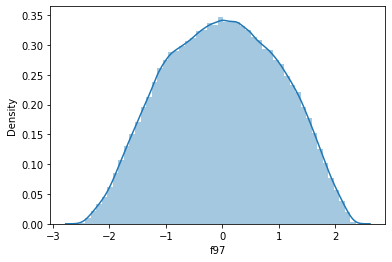

In [23]:
#We observe that skewness removed. Lets see plots as well.
for i in range(0,99):
  sns.distplot(train_new_pt.iloc[:,i])
  plt.show();


In [24]:
train_new_pt.head()

id        f0        f1        f2        f3        f4        f5  \
0 -2.196755 -1.691512  0.426243  0.509055 -1.758372 -0.540284  1.411277   
1 -2.196394  0.888882  1.767768 -0.421396 -0.734680  3.294103 -0.870842   
2 -2.196084 -0.619101 -0.713838 -0.397284 -0.549381 -0.254638  1.740840   
3 -2.195803 -0.973712 -0.800257 -0.539350  1.132801 -0.667368 -0.697720   
4 -2.195543 -0.219771 -0.672636  0.658249 -0.184668 -0.530839  0.856699   

         f6        f7        f8  ...       f91       f92       f93       f94  \
0 -0.768996  1.190411 -0.183546  ... -0.535220  0.403961 -0.605954  1.058579   
1  0.343244  0.513712 -0.149904  ... -0.635756 -0.980948 -0.148582 -0.980679   
2 -0.757145 -1.120369  0.163781  ... -0.509441  0.990457  1.381069  0.413577   
3  0.473253  1.378750 -0.649261  ... -0.508839 -1.874235 -0.531890  0.734013   
4 -0.272371 -0.836217  0.060793  ... -0.455373 -0.342871 -0.101221 -0.951981   

        f95       f96       f97       f98       f99      loss  
0  0.037208 -0.661935  1.650888  1.112626  0.620347  1.146444  
1 -0.312774 -1.785286 -0.406987  1.206119 -1.661599 -0.112805  
2  0.002025 -0.227575  0.921498  0.245084  0.871210  0.394287  
3 -1.402685  0.232754  0.379371 -0.128625  0.552022 -0.372835  
4  0.084682 -0.251115  1.258643  0.377936  0.054486 -0.738578  

[5 rows x 102 columns]

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_new_scaled = sc.fit_transform(train_new_pt)

In [26]:
col = train_new_pt.columns

In [27]:
train_new_scaled = pd.DataFrame(train_new_scaled)
train_new_scaled.columns = col

In [28]:
train_new_scaled.head()

id        f0        f1        f2        f3        f4        f5  \
0 -2.196755 -1.691512  0.426243  0.509055 -1.758372 -0.540284  1.411277   
1 -2.196394  0.888882  1.767768 -0.421396 -0.734680  3.294103 -0.870842   
2 -2.196084 -0.619101 -0.713838 -0.397284 -0.549381 -0.254638  1.740840   
3 -2.195803 -0.973712 -0.800257 -0.539350  1.132801 -0.667368 -0.697720   
4 -2.195543 -0.219771 -0.672636  0.658249 -0.184668 -0.530839  0.856699   

         f6        f7        f8  ...       f91       f92       f93       f94  \
0 -0.768996  1.190411 -0.183546  ... -0.535220  0.403961 -0.605954  1.058579   
1  0.343244  0.513712 -0.149904  ... -0.635756 -0.980948 -0.148582 -0.980679   
2 -0.757145 -1.120369  0.163781  ... -0.509441  0.990457  1.381069  0.413577   
3  0.473253  1.378750 -0.649261  ... -0.508839 -1.874235 -0.531890  0.734013   
4 -0.272371 -0.836217  0.060793  ... -0.455373 -0.342871 -0.101221 -0.951981   

        f95       f96       f97       f98       f99      loss  
0  0.037208 -0.661935  1.650888  1.112626  0.620347  1.146444  
1 -0.312774 -1.785286 -0.406987  1.206119 -1.661599 -0.112805  
2  0.002025 -0.227575  0.921498  0.245084  0.871210  0.394287  
3 -1.402685  0.232754  0.379371 -0.128625  0.552022 -0.372835  
4  0.084682 -0.251115  1.258643  0.377936  0.054486 -0.738578  

[5 rows x 102 columns]

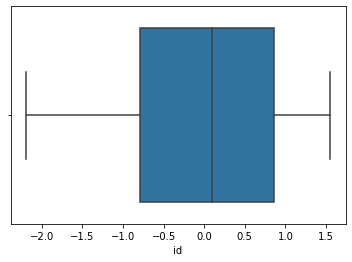

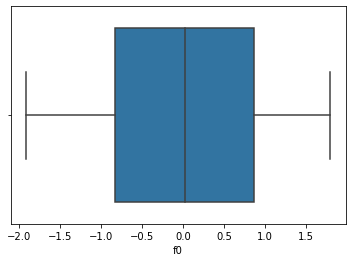

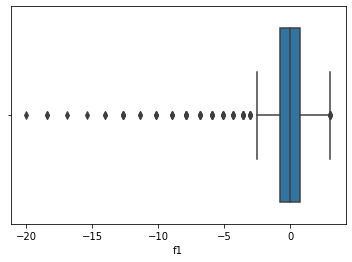

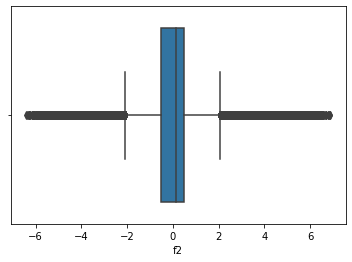

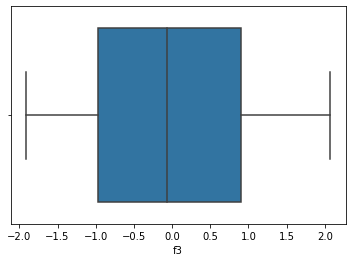

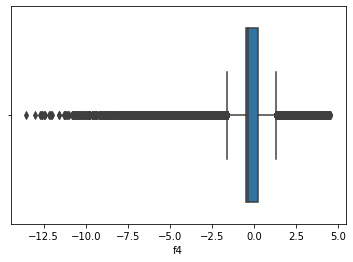

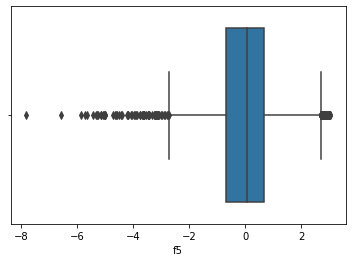

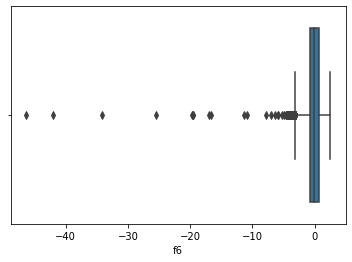

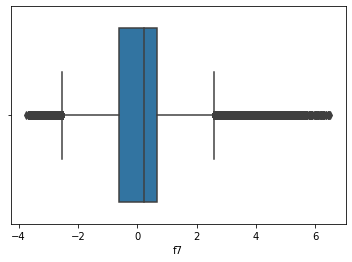

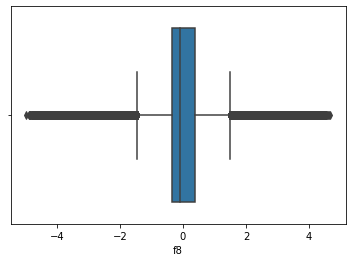

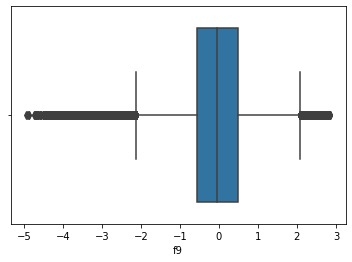

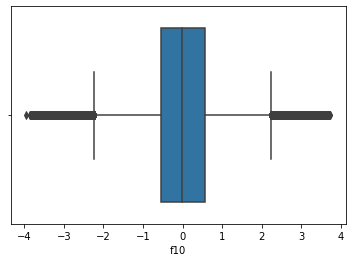

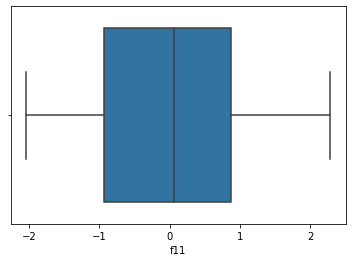

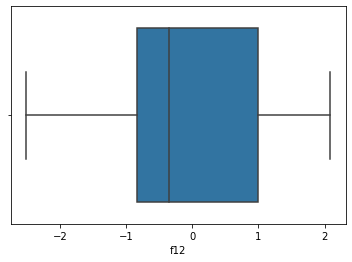

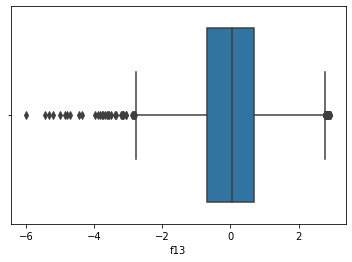

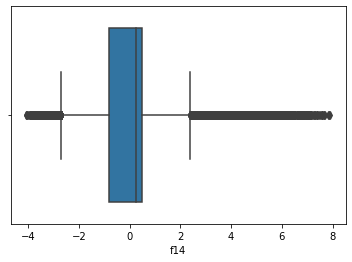

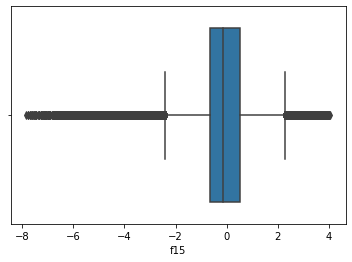

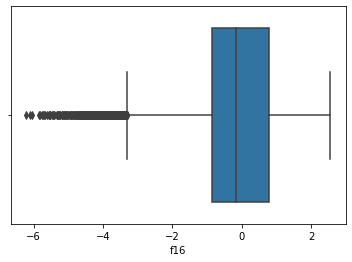

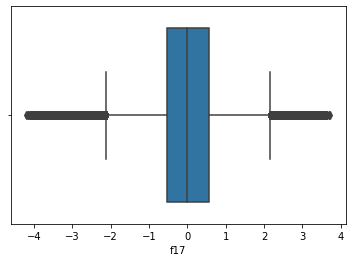

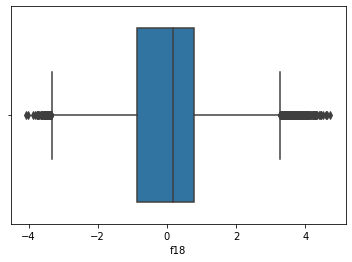

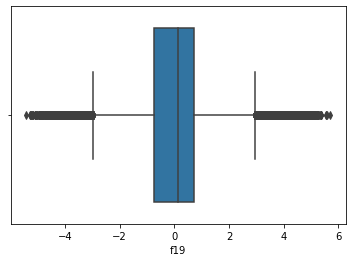

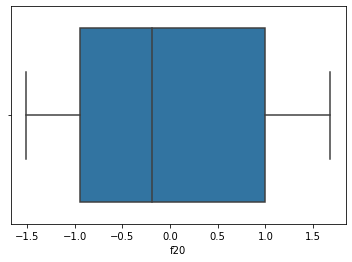

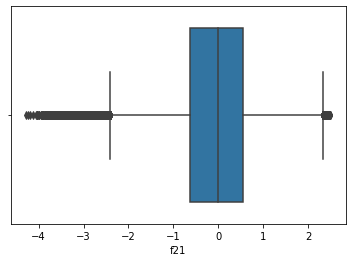

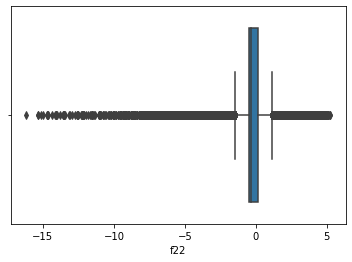

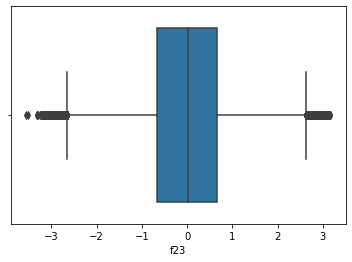

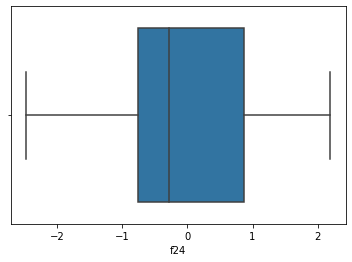

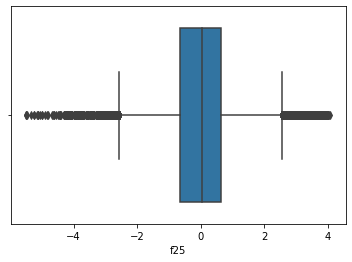

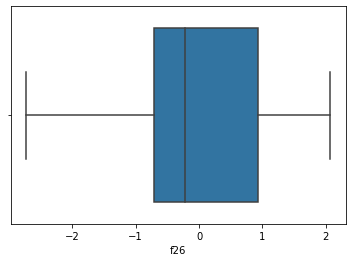

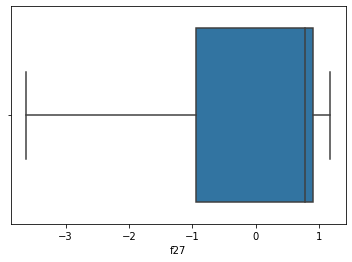

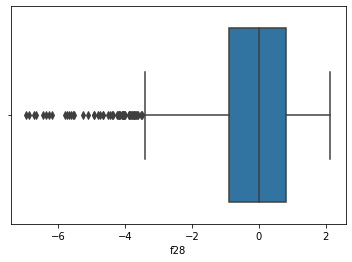

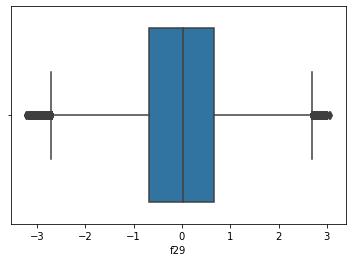

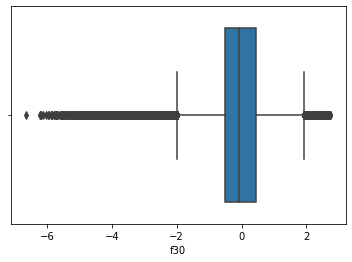

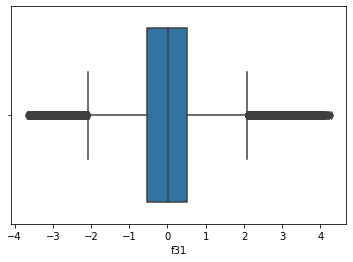

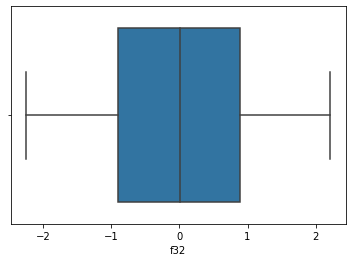

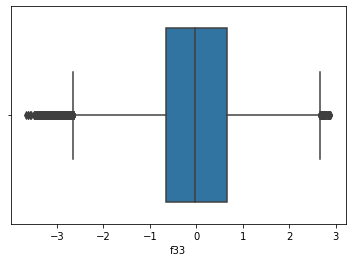

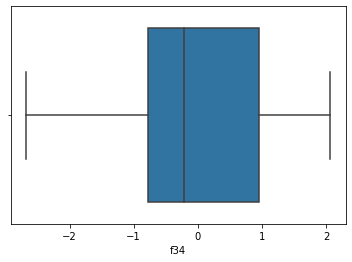

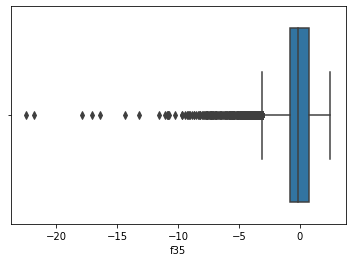

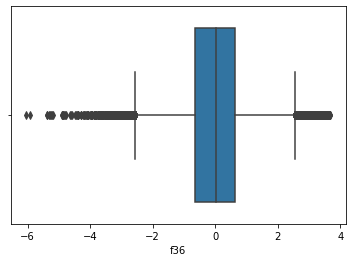

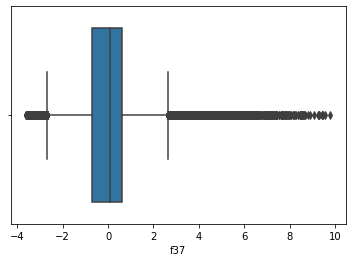

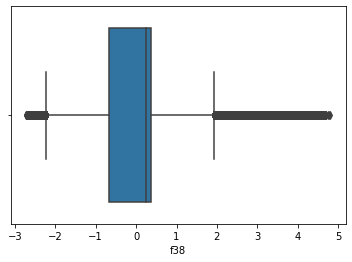

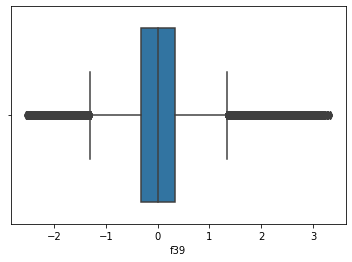

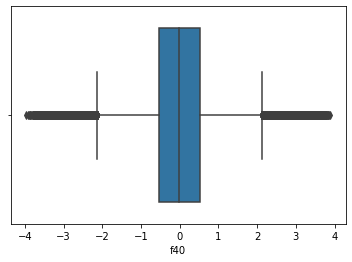

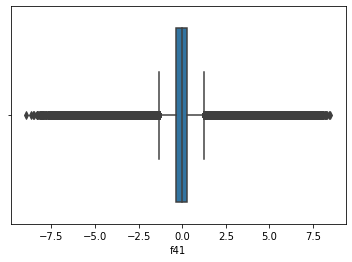

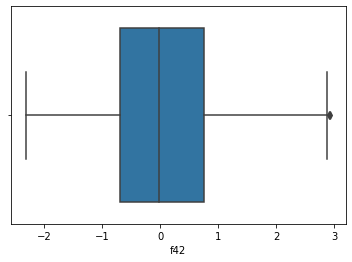

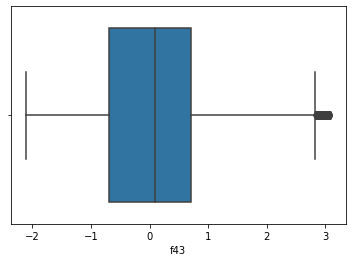

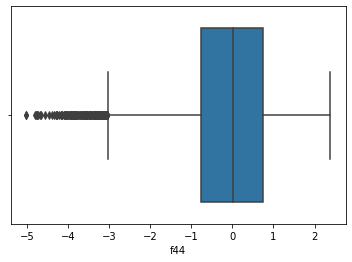

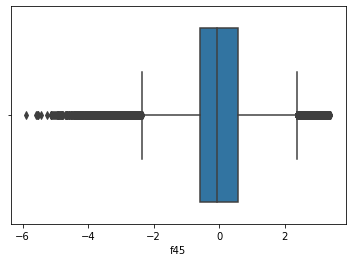

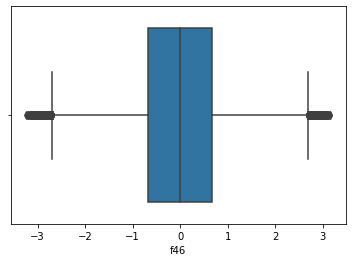

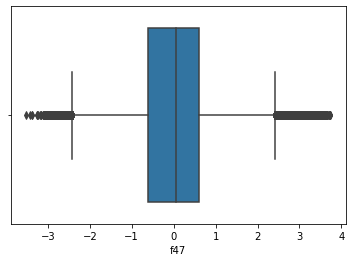

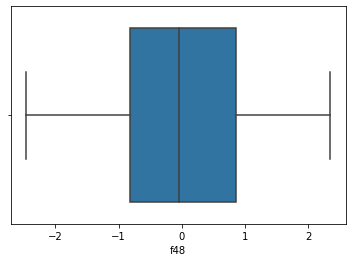

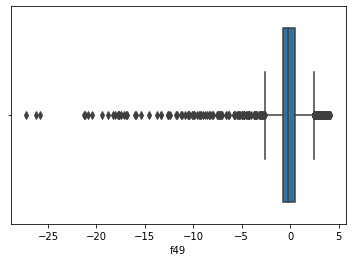

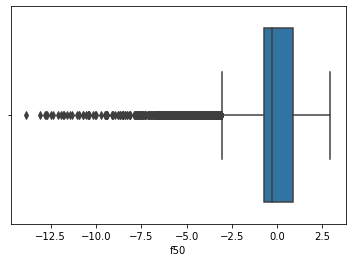

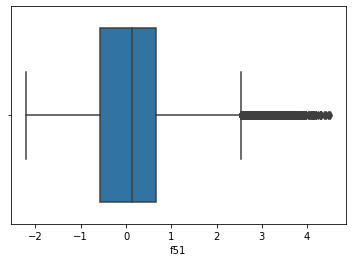

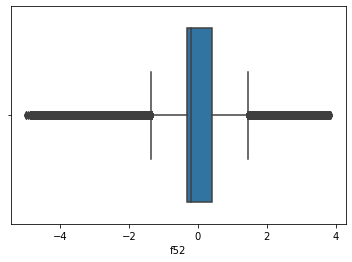

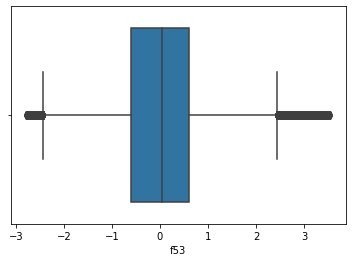

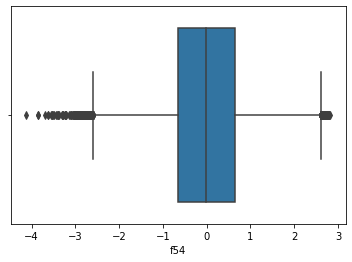

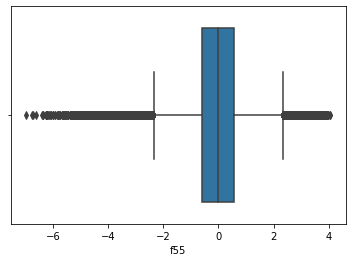

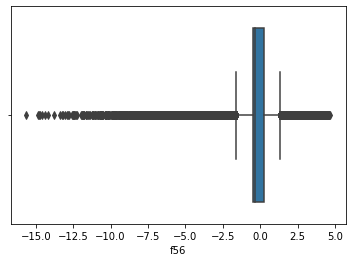

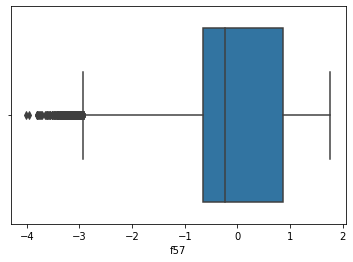

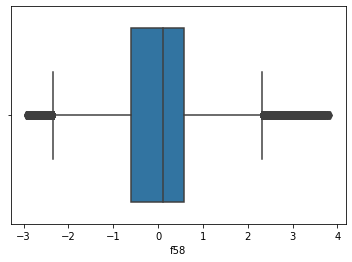

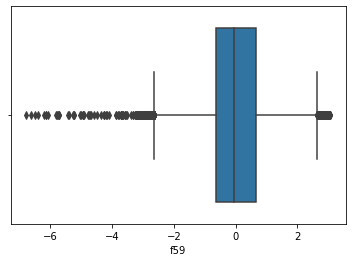

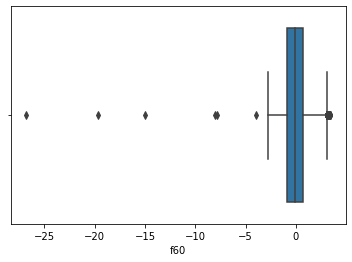

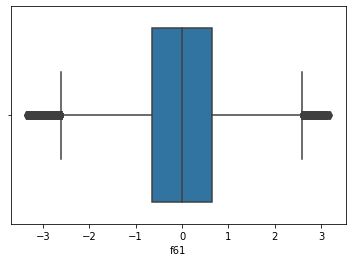

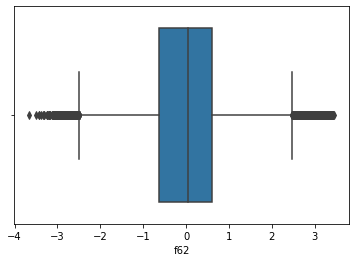

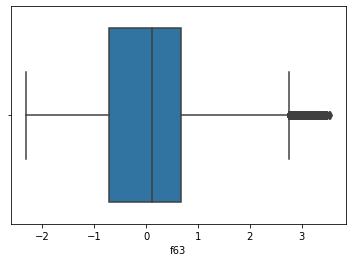

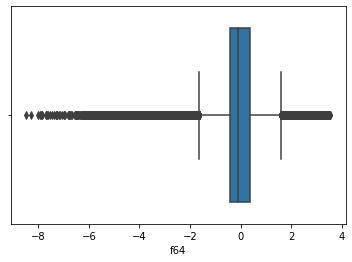

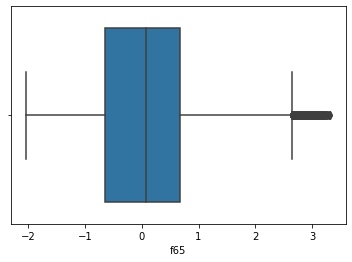

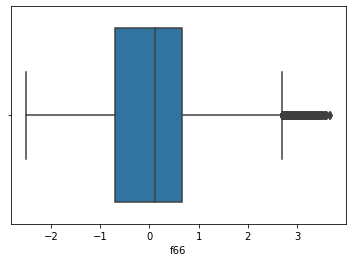

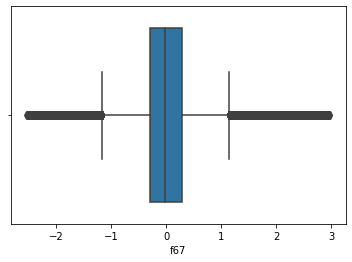

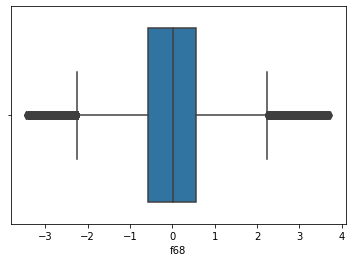

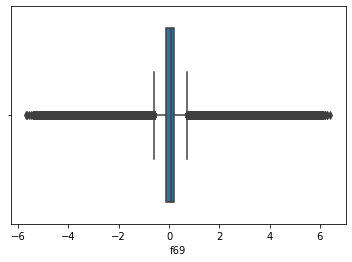

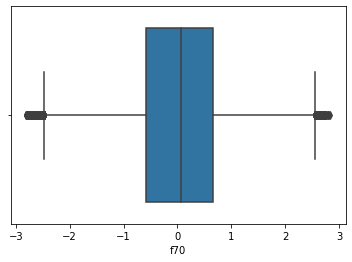

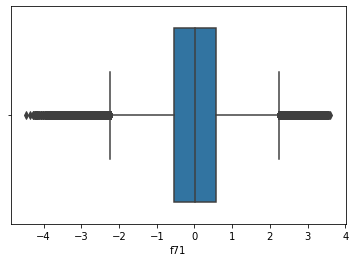

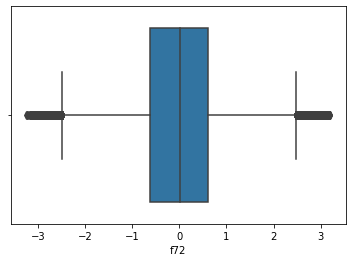

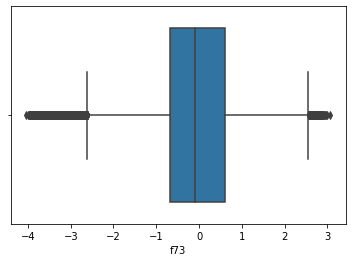

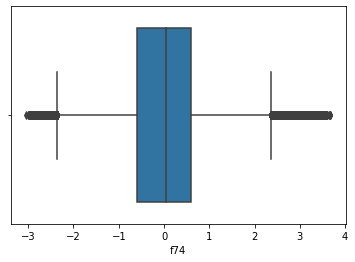

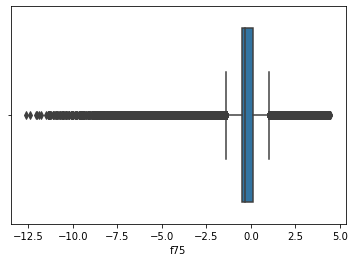

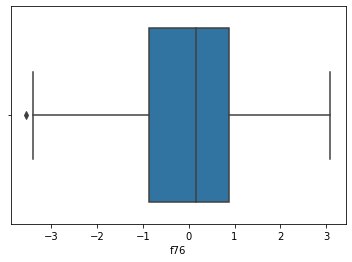

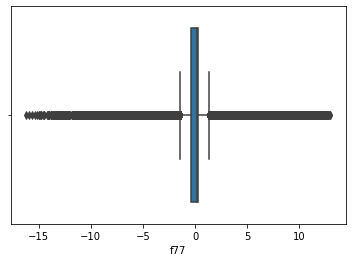

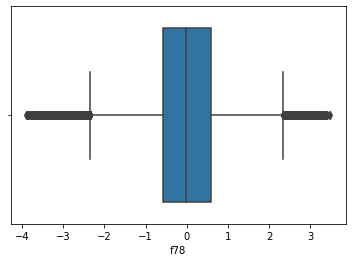

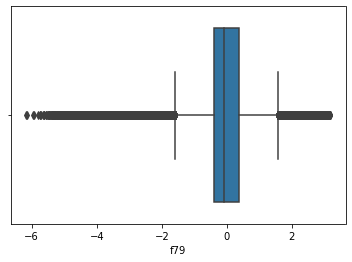

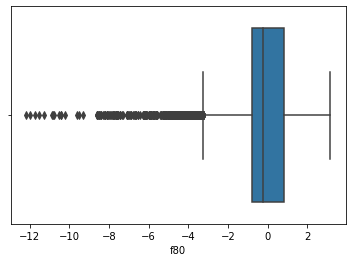

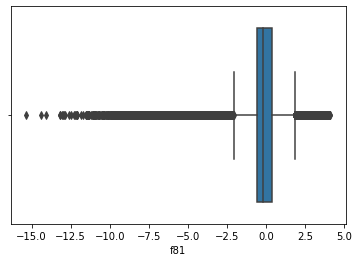

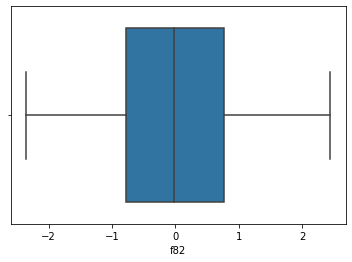

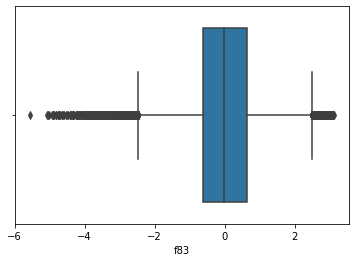

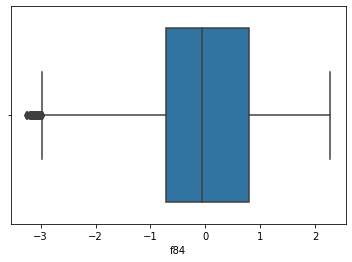

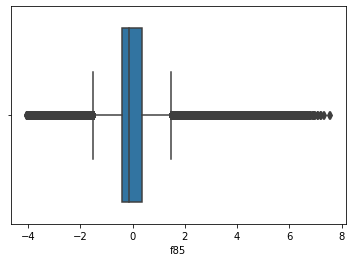

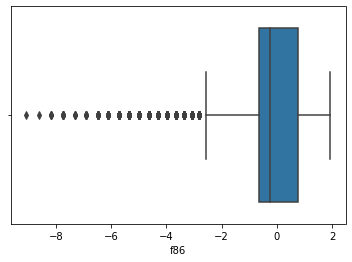

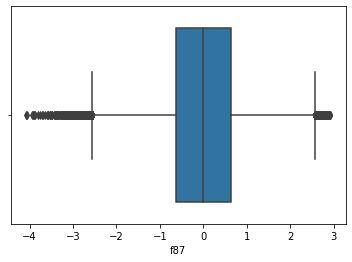

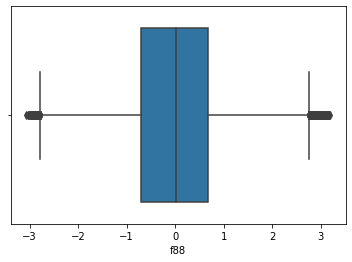

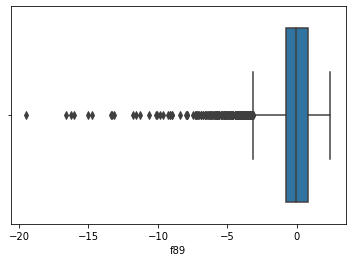

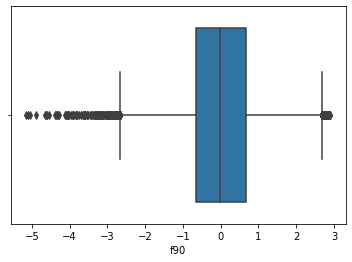

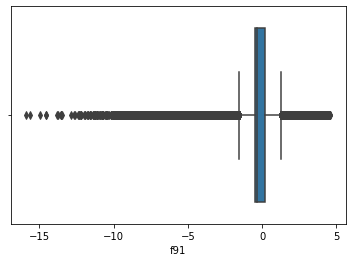

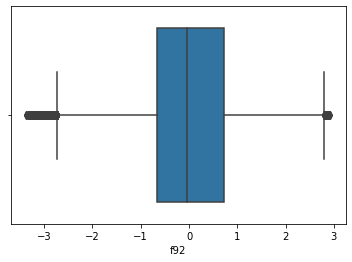

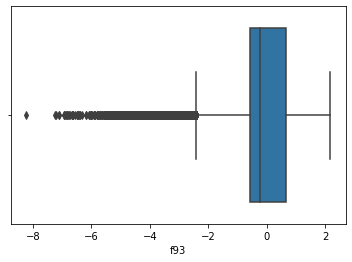

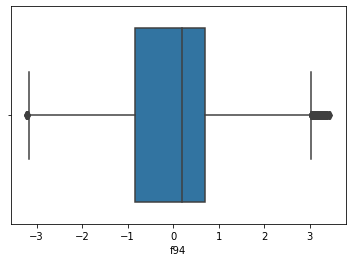

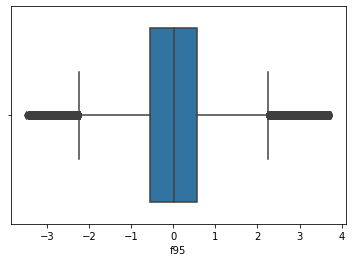

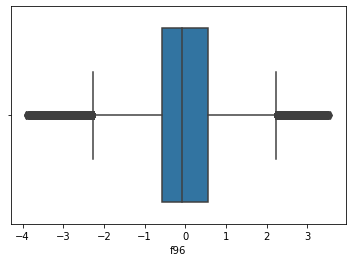

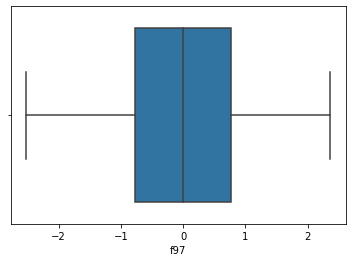

In [29]:
#plotting boxplots again after standerising data

for i in range(0,99):
  sns.boxplot(train_new_scaled.iloc[:,i])
  plt.show();

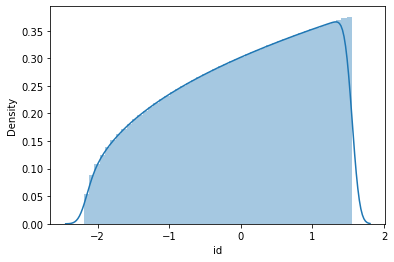

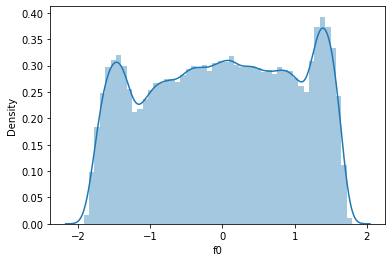

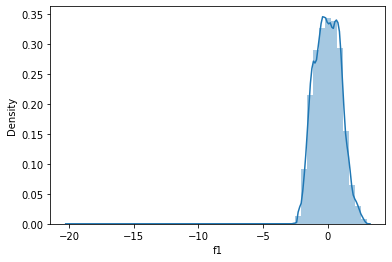

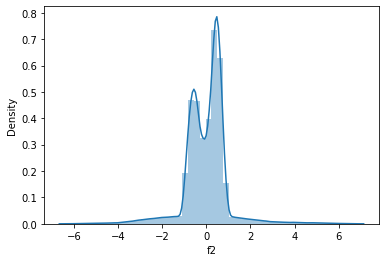

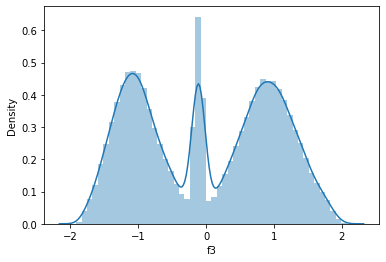

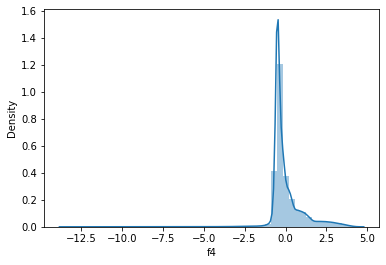

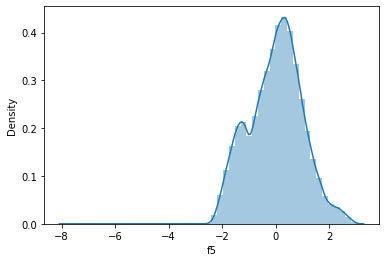

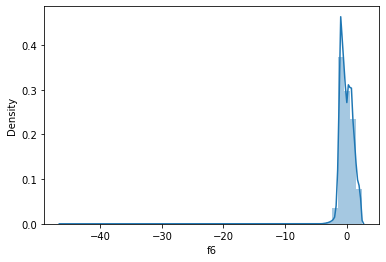

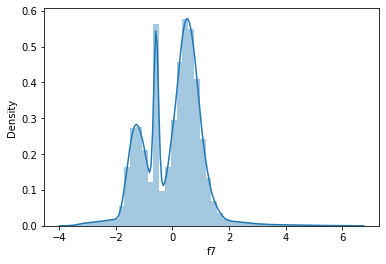

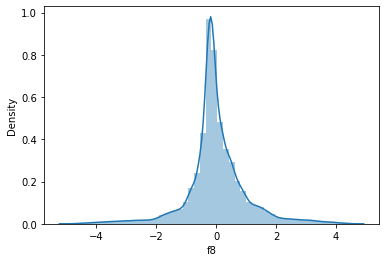

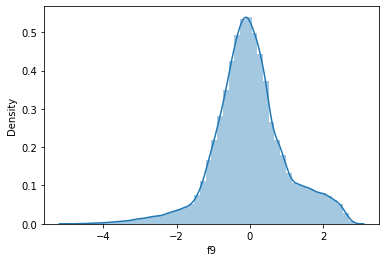

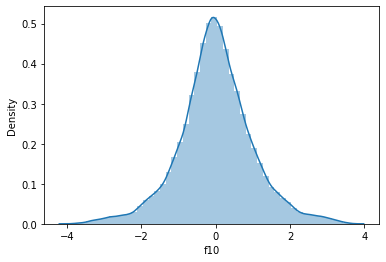

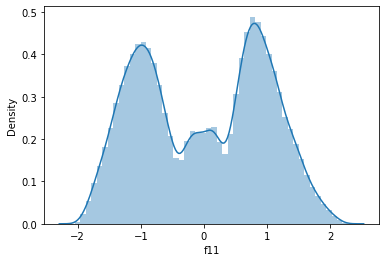

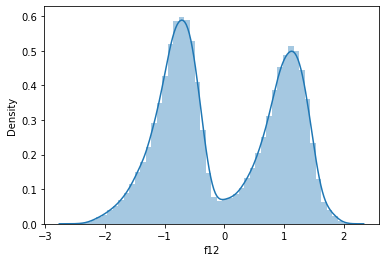

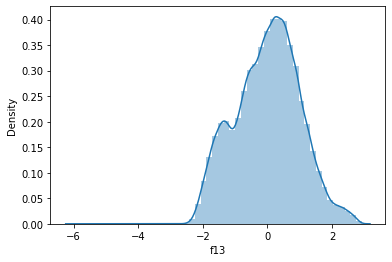

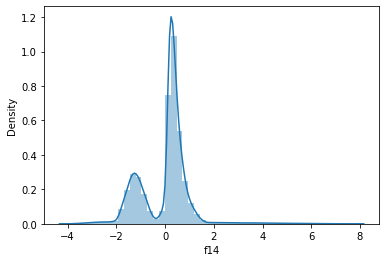

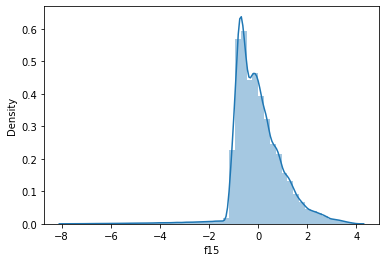

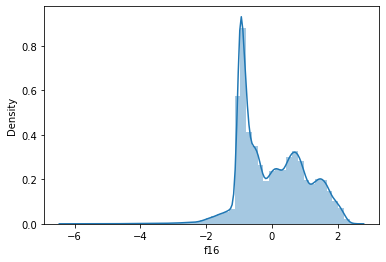

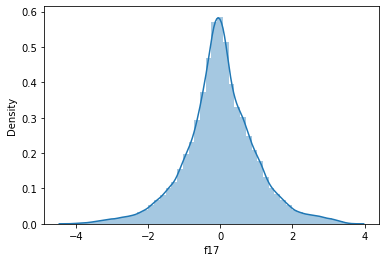

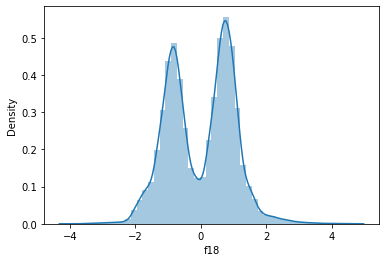

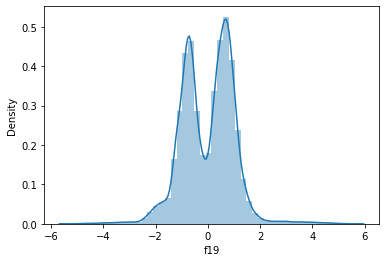

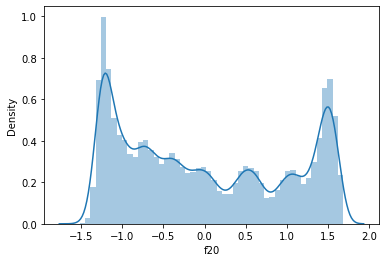

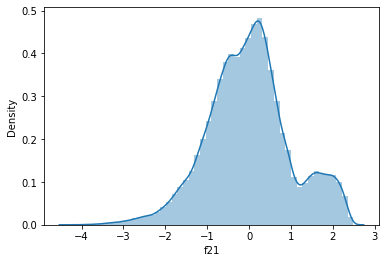

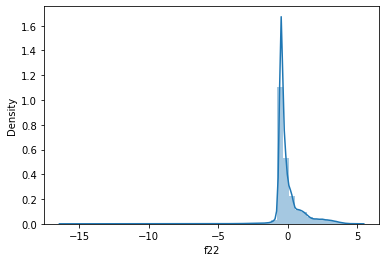

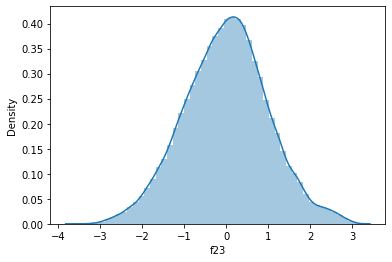

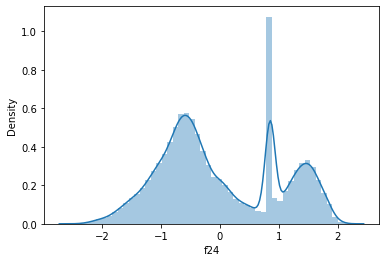

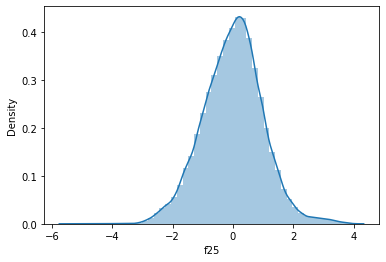

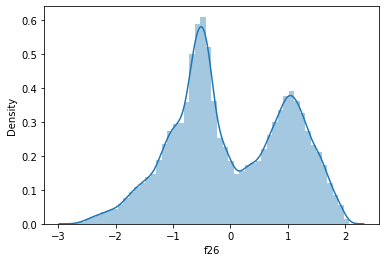

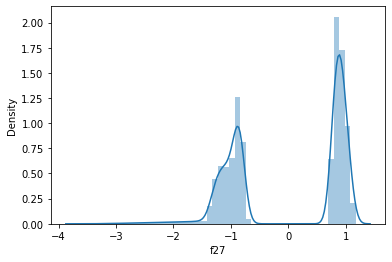

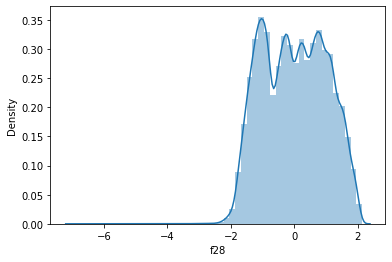

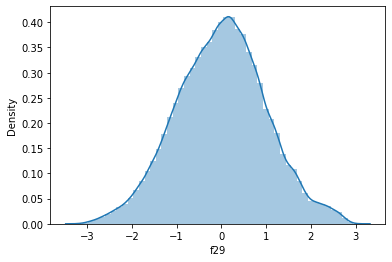

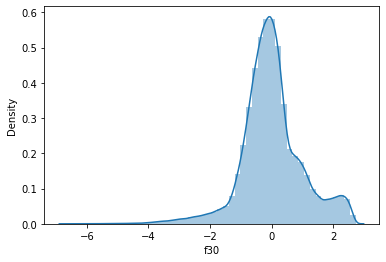

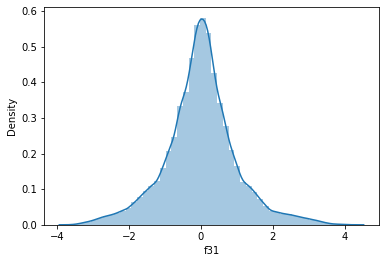

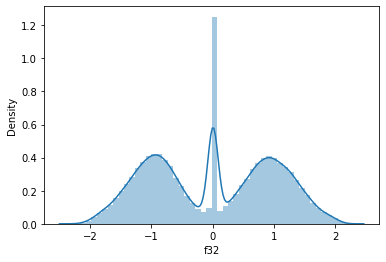

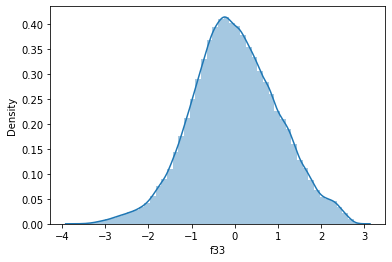

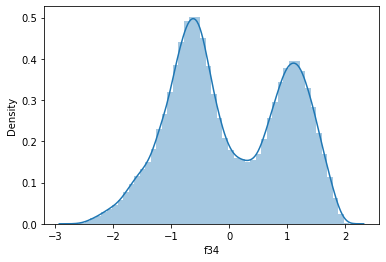

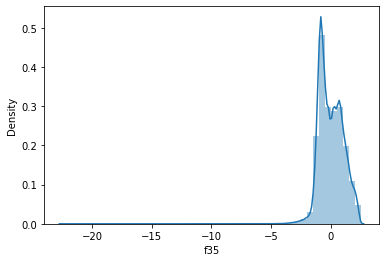

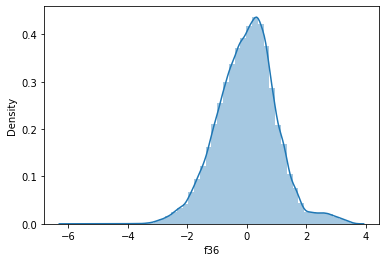

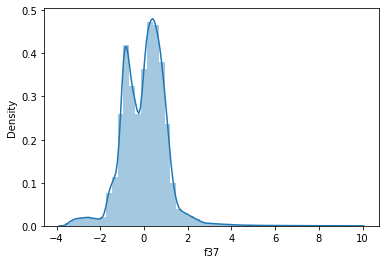

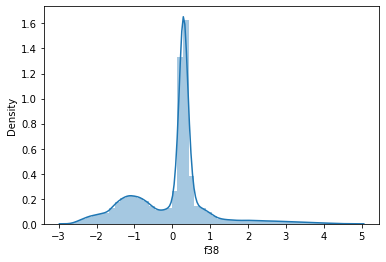

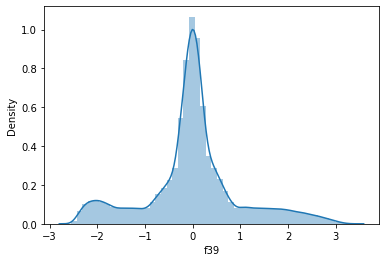

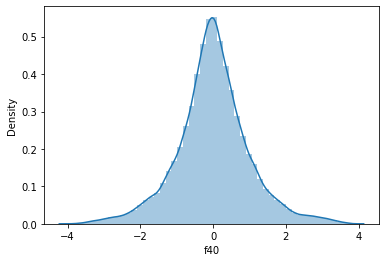

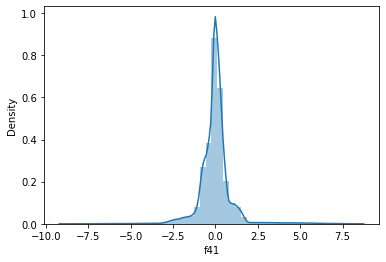

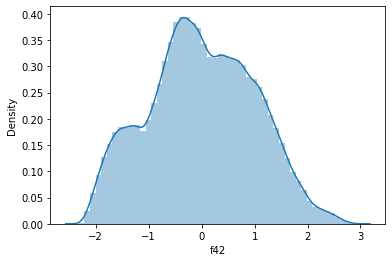

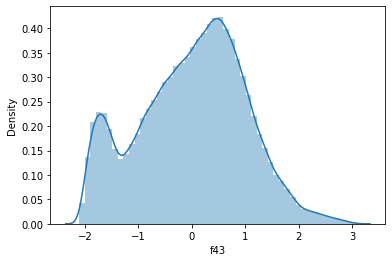

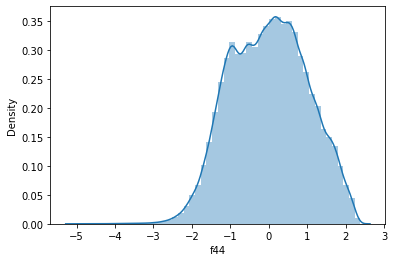

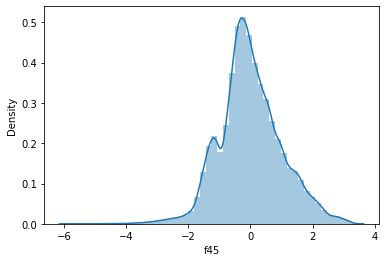

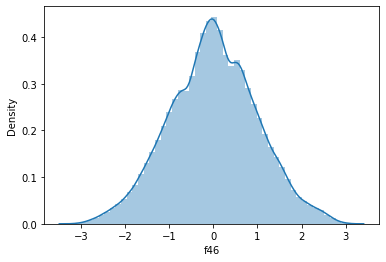

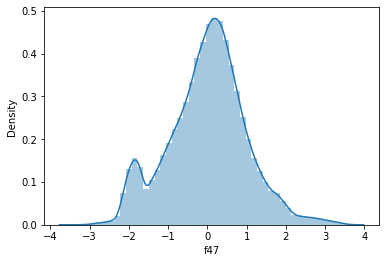

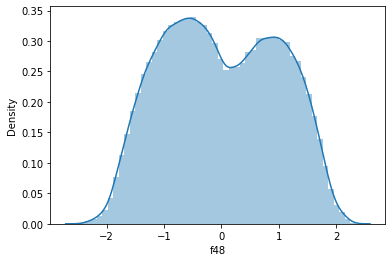

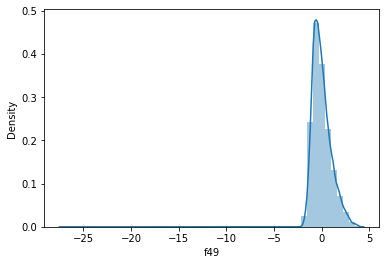

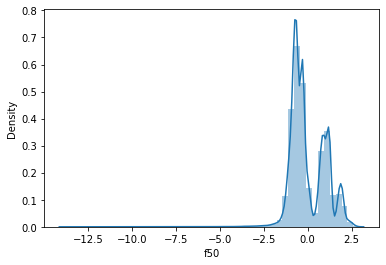

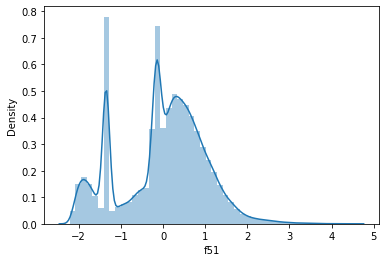

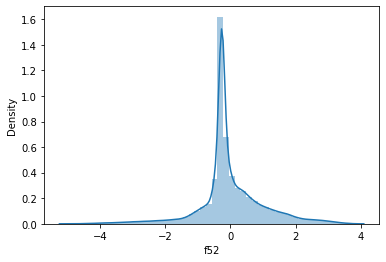

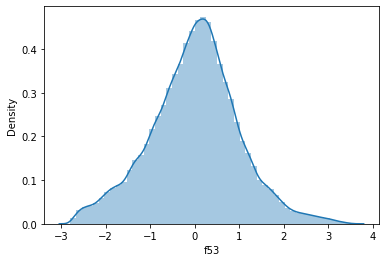

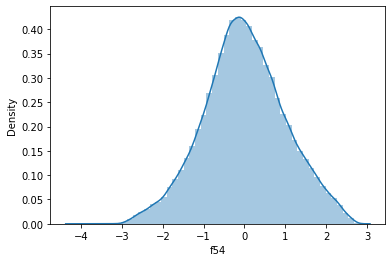

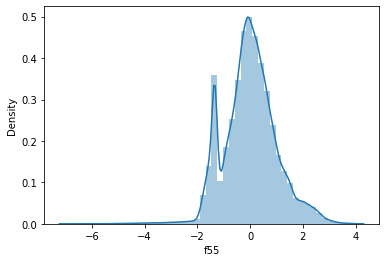

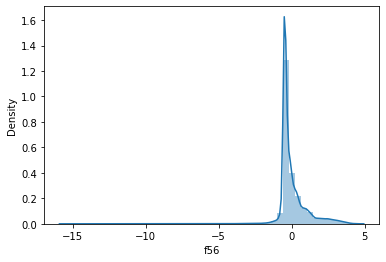

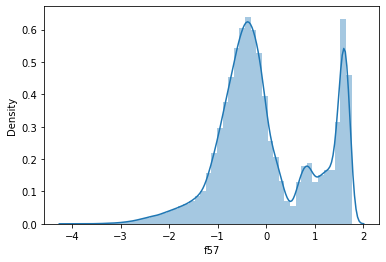

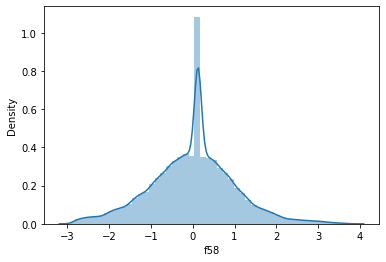

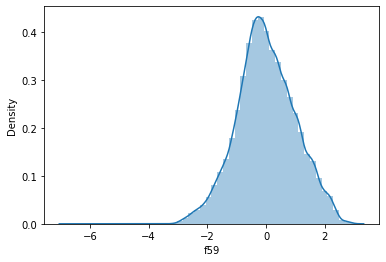

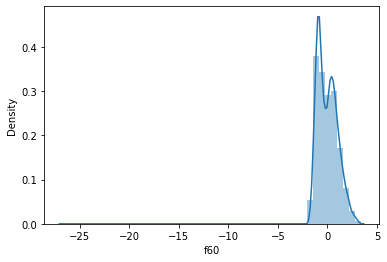

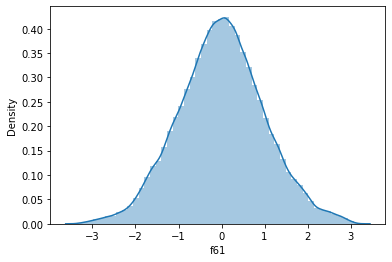

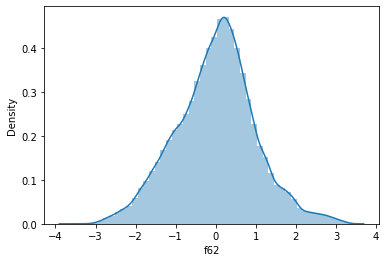

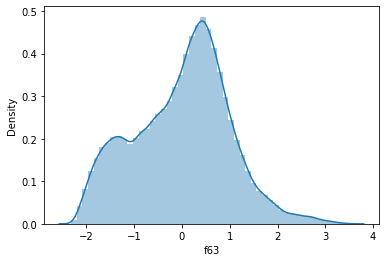

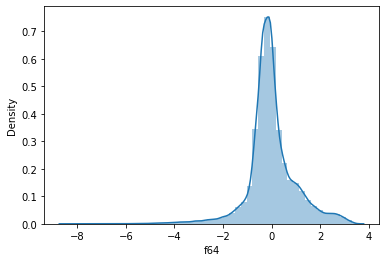

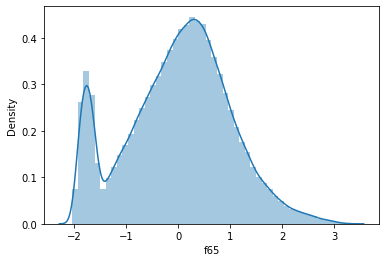

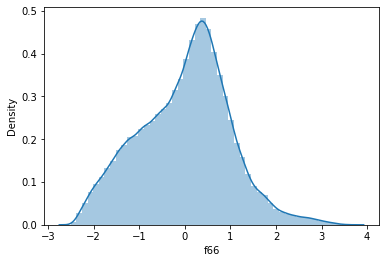

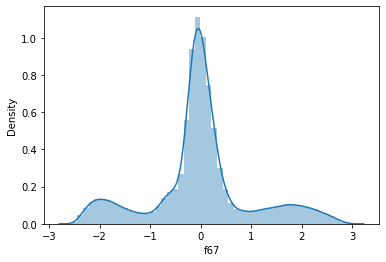

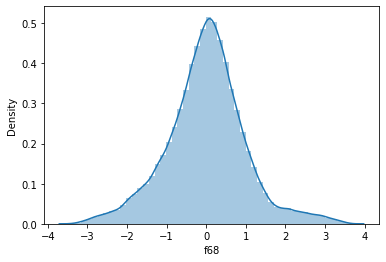

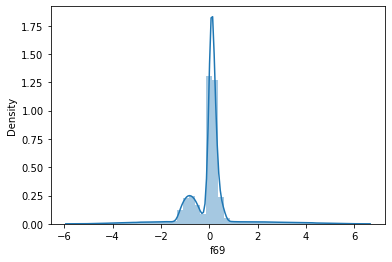

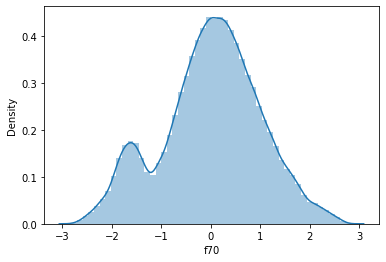

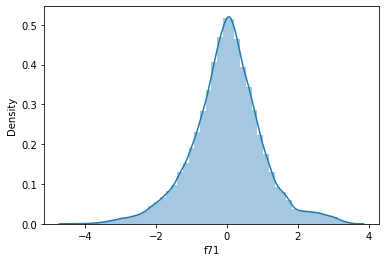

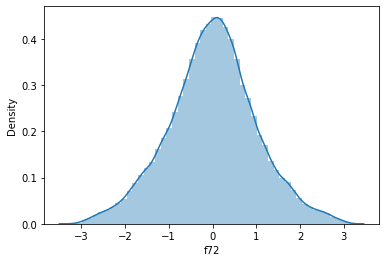

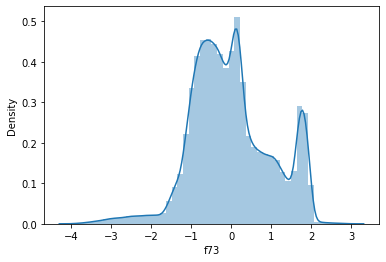

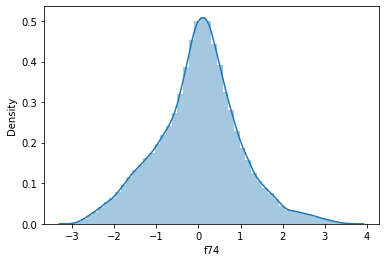

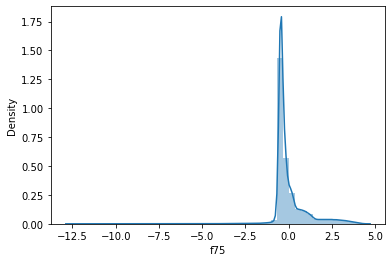

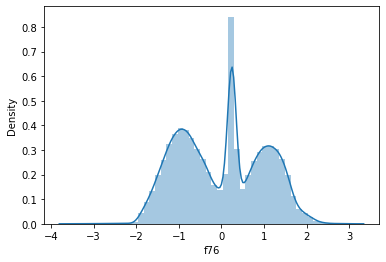

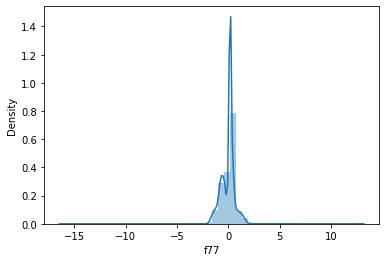

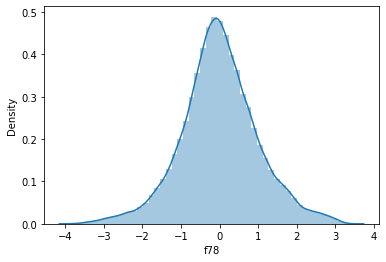

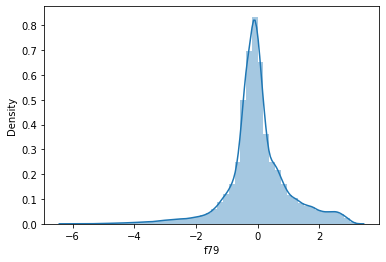

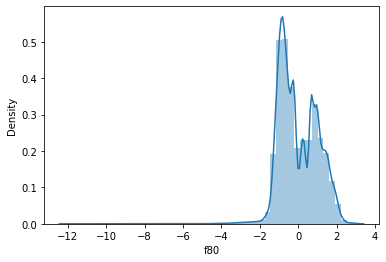

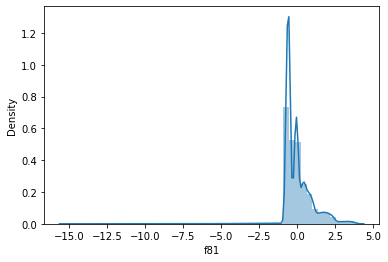

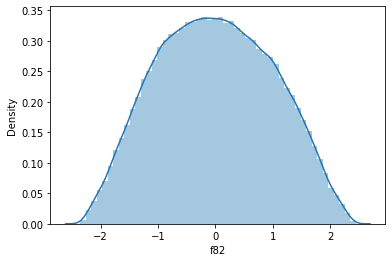

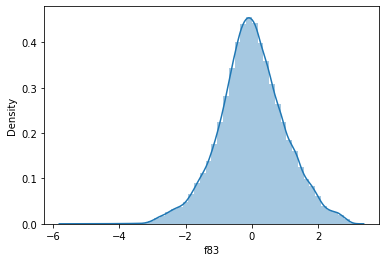

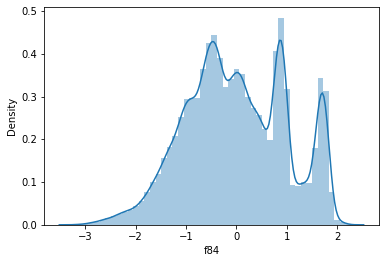

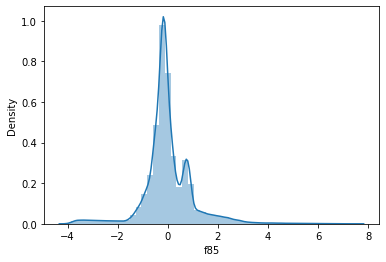

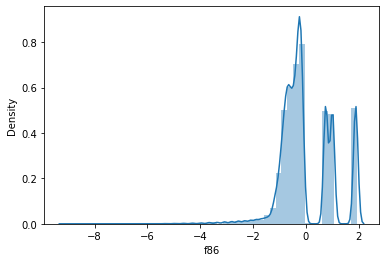

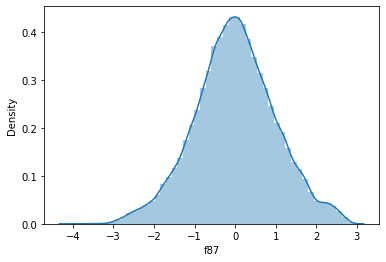

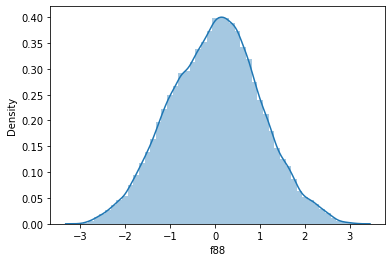

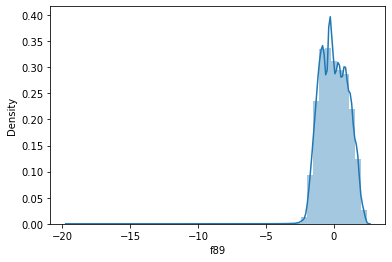

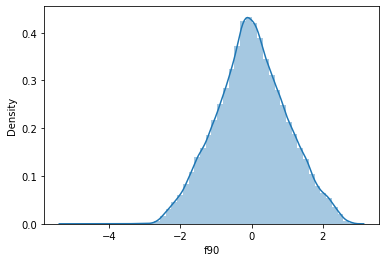

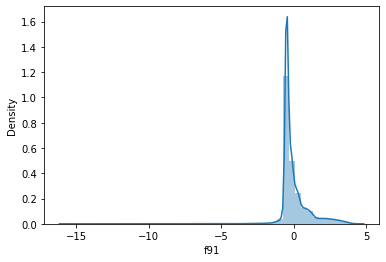

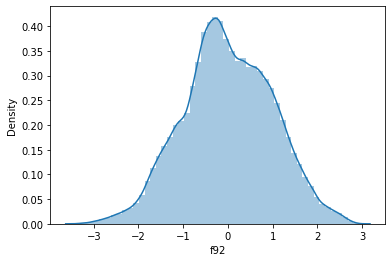

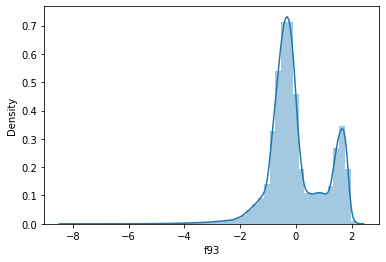

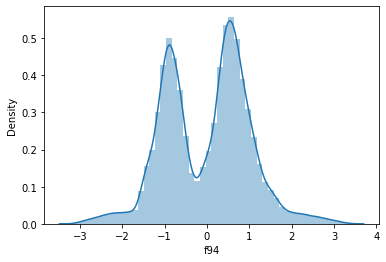

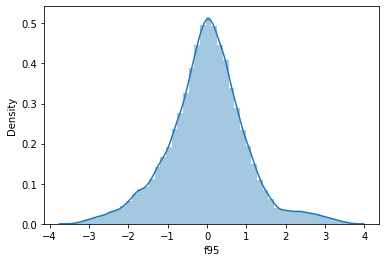

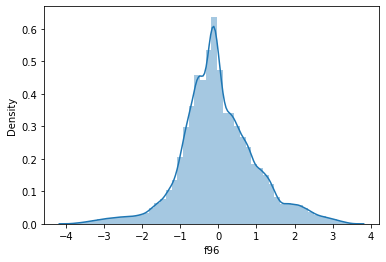

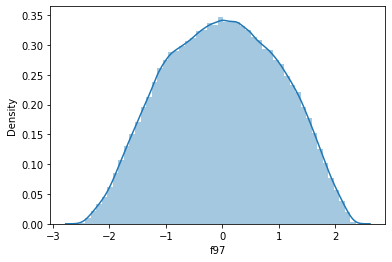

In [30]:
#plotting distplot again after standerising data to see skewness

for i in range(0,99):
  sns.distplot(train_new_scaled.iloc[:,i])
  plt.show();

In [31]:
train_new_scaled.head()

id        f0        f1        f2        f3        f4        f5  \
0 -2.196755 -1.691512  0.426243  0.509055 -1.758372 -0.540284  1.411277   
1 -2.196394  0.888882  1.767768 -0.421396 -0.734680  3.294103 -0.870842   
2 -2.196084 -0.619101 -0.713838 -0.397284 -0.549381 -0.254638  1.740840   
3 -2.195803 -0.973712 -0.800257 -0.539350  1.132801 -0.667368 -0.697720   
4 -2.195543 -0.219771 -0.672636  0.658249 -0.184668 -0.530839  0.856699   

         f6        f7        f8  ...       f91       f92       f93       f94  \
0 -0.768996  1.190411 -0.183546  ... -0.535220  0.403961 -0.605954  1.058579   
1  0.343244  0.513712 -0.149904  ... -0.635756 -0.980948 -0.148582 -0.980679   
2 -0.757145 -1.120369  0.163781  ... -0.509441  0.990457  1.381069  0.413577   
3  0.473253  1.378750 -0.649261  ... -0.508839 -1.874235 -0.531890  0.734013   
4 -0.272371 -0.836217  0.060793  ... -0.455373 -0.342871 -0.101221 -0.951981   

        f95       f96       f97       f98       f99      loss  
0  0.037208 -0.661935  1.650888  1.112626  0.620347  1.146444  
1 -0.312774 -1.785286 -0.406987  1.206119 -1.661599 -0.112805  
2  0.002025 -0.227575  0.921498  0.245084  0.871210  0.394287  
3 -1.402685  0.232754  0.379371 -0.128625  0.552022 -0.372835  
4  0.084682 -0.251115  1.258643  0.377936  0.054486 -0.738578  

[5 rows x 102 columns]

In [32]:
train_new_scaled = train_new_scaled.drop(['id','loss'],axis =1)

In [33]:
train_new_scaled.head()

f0        f1        f2        f3        f4        f5        f6  \
0 -1.691512  0.426243  0.509055 -1.758372 -0.540284  1.411277 -0.768996   
1  0.888882  1.767768 -0.421396 -0.734680  3.294103 -0.870842  0.343244   
2 -0.619101 -0.713838 -0.397284 -0.549381 -0.254638  1.740840 -0.757145   
3 -0.973712 -0.800257 -0.539350  1.132801 -0.667368 -0.697720  0.473253   
4 -0.219771 -0.672636  0.658249 -0.184668 -0.530839  0.856699 -0.272371   

         f7        f8        f9  ...       f90       f91       f92       f93  \
0  1.190411 -0.183546 -1.197564  ... -0.330662 -0.535220  0.403961 -0.605954   
1  0.513712 -0.149904  1.066858  ... -1.214004 -0.635756 -0.980948 -0.148582   
2 -1.120369  0.163781  0.725069  ... -0.466620 -0.509441  0.990457  1.381069   
3  1.378750 -0.649261 -1.192661  ... -0.464883 -0.508839 -1.874235 -0.531890   
4 -0.836217  0.060793 -1.023644  ...  0.116480 -0.455373 -0.342871 -0.101221   

        f94       f95       f96       f97       f98       f99  
0  1.058579  0.037208 -0.661935  1.650888  1.112626  0.620347  
1 -0.980679 -0.312774 -1.785286 -0.406987  1.206119 -1.661599  
2  0.413577  0.002025 -0.227575  0.921498  0.245084  0.871210  
3  0.734013 -1.402685  0.232754  0.379371 -0.128625  0.552022  
4 -0.951981  0.084682 -0.251115  1.258643  0.377936  0.054486  

[5 rows x 100 columns]

In [34]:
# Applying PCA for feature reduction
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit_transform(train_new_scaled)

array([[ 1.28071376, -0.09294311, -0.31471732, ...,  0.38909525,
         1.81860306,  0.14864424],
       [ 1.16913039,  1.10889097,  0.15510031, ...,  0.6987908 ,
        -1.63766642,  0.26456744],
       [ 0.31521865, -0.18538889,  1.60159309, ...,  0.19304698,
        -0.49083539,  0.62843738],
       ...,
       [-0.59086775,  0.58266454, -0.42363982, ...,  0.64034622,
        -0.22084564, -0.78629079],
       [ 0.01487487, -1.22898835,  0.20280648, ..., -0.85020235,
        -0.63830534, -1.41023889],
       [ 0.66734763,  1.05016673, -3.88729906, ..., -1.22772074,
         1.17826225, -0.4643734 ]])

In [35]:
pca.components_

array([[ 0.11378661,  0.04662332, -0.08667474, ...,  0.03562529,
         0.01556598,  0.10880196],
       [-0.01671161,  0.05248054,  0.10245053, ..., -0.19233416,
        -0.13124876, -0.02453608],
       [-0.00513995, -0.0452924 , -0.0821725 , ...,  0.02355509,
        -0.00594496,  0.0140794 ],
       ...,
       [-0.08506246, -0.05245851, -0.04871186, ...,  0.02738866,
        -0.1529399 , -0.05537722],
       [-0.01301631,  0.05851401, -0.16978404, ..., -0.00278964,
        -0.04064175,  0.01133107],
       [-0.00582095, -0.03184809, -0.12611811, ...,  0.02547684,
        -0.01671238, -0.04201983]])

In [36]:
pca.explained_variance_ratio_

array([0.01245325, 0.01212569, 0.01195969, 0.01182894, 0.01170351,
       0.01164314, 0.01147928, 0.01136748, 0.01131191, 0.01123038,
       0.01115085, 0.01113512, 0.01102822, 0.01095236, 0.01091601,
       0.01089363, 0.010819  , 0.01081494, 0.01077896, 0.01073125,
       0.01064407, 0.01064084, 0.01056121, 0.01049221, 0.01046061,
       0.01045094, 0.01040967, 0.01039936, 0.01036045, 0.01034243,
       0.01029858, 0.01027007, 0.01022661, 0.01021049, 0.01019388,
       0.01016418, 0.01015831, 0.01014265, 0.0101259 , 0.01010412,
       0.01005925, 0.01004968, 0.01001794, 0.00999573, 0.00997164,
       0.00993938, 0.00992376, 0.00989123, 0.0098874 , 0.00987611,
       0.00986458, 0.00982328, 0.00981377, 0.00978446, 0.00977217,
       0.00975165, 0.00973974, 0.00972612, 0.00970028, 0.00967572,
       0.00966216, 0.00964152, 0.00963516, 0.00959806, 0.00958216,
       0.0095652 , 0.00954126, 0.00951258, 0.0095059 , 0.00949128,
       0.00944889, 0.00944454, 0.00942447, 0.00940718, 0.00939

In [37]:
# Making a scree plot for the explained variance

In [38]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

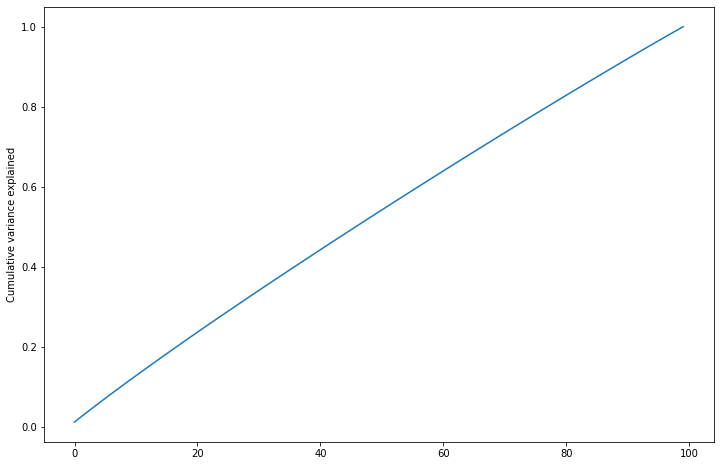

In [39]:
fig = plt.figure(figsize=[12,8])
#plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
#plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [40]:
# Lets take 80 predictors to get at least 85 % of variance explained as per sree plot shown

In [41]:
pca = PCA(n_components=80,random_state=42)
train_new_scaled_pca=pca.fit_transform(train_new_scaled)

In [42]:
train_new_scaled_pca.shape

(250000, 80)

# Modelling

In [43]:
X = train_new_scaled_pca
y = train['loss']

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.25,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((187500, 80), (62500, 80), (187500,), (62500,))

#Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [46]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("r2score_train ",metrics.r2_score(y_train, y_train_pred))
print("r2score_test ",metrics.r2_score(y_test, y_test_pred))


r2score_train  0.010670754958937878
r2score_test  0.010643192062312234


# XGBoost

In [47]:
import xgboost as xgb
xgbr = xgb.XGBRegressor()
base_model1 = xgbr.fit(X_train,y_train)

[03:36:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [48]:
y_train_pred = base_model1.predict(X_train)
y_test_pred = base_model1.predict(X_test)
print("r2score_train ",metrics.r2_score(y_train, y_train_pred))
print("r2score_test ",metrics.r2_score(y_test, y_test_pred))

r2score_train  0.017889534182409794
r2score_test  0.009126891799293047


Model tuning with Cross Validation

In [ ]:
from sklearn import model_selection

params = {'learning_rate' : [0.1,0.2,0.3,0.4,0.5],
         'max_depth' :[2,4,6,8,10],
          'n_estimators':[10,20,30,50,60,80]}
xgbr = model_selection.GridSearchCV(estimator=base_model1,
                                       param_grid=params,
                                       n_jobs=-1,
                                       cv=3)

xgbr.fit(X_train, y_train)

In [ ]:
print(xgbr.best_params_)
print(xgbr.best_score_)
print(xgbr.best_estimator_)

In [ ]:
#y_train_pred = xgbr.predict(X_train_scaled_pca)
#y_test_pred = xgbr.predict(X_test_scaled_pca)

In [ ]:
metrics.r2_score(y_train, y_train_pred)

In [ ]:
metrics.r2_score(y_test, y_test_pred)

In [ ]:
best_model = xgbr.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print("r2score_train ",metrics.r2_score(y_train, y_train_pred))
print("r2score_test ",metrics.r2_score(y_test, y_test_pred))


Now, Evaluting loss on test data given with final model"model":

In [50]:
test.shape

(150000, 101)

In [51]:
test.head()

id        f0   f1        f2        f3          f4        f5         f6  \
0  250000  0.812665   15 -1.239120 -0.893251    295.5770  15.87120   23.04360   
1  250001  0.190344  131 -0.501361  0.801921     64.8866   3.09703  344.80500   
2  250002  0.919671   19 -0.057382  0.901419  11961.2000  16.39650  273.24000   
3  250003  0.860985   19 -0.549509  0.471799   7501.6000   2.80698   71.08170   
4  250004  0.313229   89  0.588509  0.167705   2931.2600   4.34986    1.57187   

         f7         f8  ...       f90        f91       f92      f93       f94  \
0  0.942256  29.898000  ...  0.446389   -422.332  -1.44630  1.69075  1.059300   
1  0.807194  38.421900  ...  0.377179  10352.200  21.06270  1.84351  0.251895   
2 -0.003300  37.940000  ...  0.990140   3224.020  -2.25287  1.55100 -0.559157   
3  0.792136   0.395235  ...  1.396880   9689.760  14.77150  1.41390  0.329272   
4  1.118300   7.754630  ...  0.862502   2693.350  44.18050  1.58020 -0.191021   

         f95      f96       f97       f98       f99  
0  -3.010570  1.94664  0.529470  1.386950   8.78767  
1   4.440570  1.90309  0.248534  0.863881  11.79390  
2  17.838600  1.83385  0.931796  2.336870   9.05400  
3   0.802437  2.23251  0.893348  1.359470   4.84833  
4  26.253000  2.68238  0.361923  1.532800   3.70660  

[5 rows x 101 columns]

In [52]:
test_copy = test

In [53]:
test = test.drop(['id'],axis = 1)

Making final test data to have same shape as trained data for final prediction

In [57]:
test_new_scaled_pca=pca.fit_transform(test)

In [59]:
test_new_scaled_pca.shape

(150000, 80)

In [61]:
y_pred_test =model.predict(test_new_scaled_pca)

In [64]:
y_pred_test

array([-3.40701566e+08,  6.82073797e+08, -1.56100670e+08, ...,
       -1.50038988e+08,  7.82259966e+08, -2.91185846e+08])

# Submission data

In [66]:
submission = pd.DataFrame(
    {'id':test_copy["id"] ,
     'loss': y_pred_test},columns=['id', 'loss'])

In [68]:
submission.to_csv("/gdrive/My Drive/Colab Notebooks/Tabular Playground Series/Aug 2021/submission.csv", index=False)
submission.head(10)

id          loss
0  250000 -3.407016e+08
1  250001  6.820738e+08
2  250002 -1.561007e+08
3  250003 -4.493379e+08
4  250004  1.081455e+09
5  250005 -7.406931e+08
6  250006 -5.461378e+08
7  250007  2.807619e+08
8  250008 -3.724657e+07
9  250009 -1.969330e+08